### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Para ello vamos a utilizar un conjunto de datos provenientes de un estudio de granos pertenecientes a distintas variedades de trigo. Los atributos de los datos provienen de una visualización de alta calidad de la estructura interna del grano utilizando una técnica de rayos X suaves. La ventaja de esta técnica es que no es destructiva y es considerablemente más económica que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando grano de trigo cosechado en combinación procedente de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Los atributos observados son seis parámetros geométricos medidos en los granos de trigo:

V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla

Se trata de analizar de que manera estos atributos permiten generar grupos en los datos que correspondan idealmente a cada variedad de trigo disponible en los datos.

      V1    V2    V3    V4    V5    V6
1  16.63 15.46 6.053 3.465 2.040 5.877
2  20.03 16.90 6.493 3.857 3.063 6.320
3  15.60 15.11 5.832 3.286 2.725 5.752
4  10.82 12.83 5.180 2.630 4.853 5.089
5  14.79 14.52 5.545 3.291 2.704 5.111
6  14.03 14.16 5.438 3.201 1.717 5.001
7  16.44 15.25 5.884 3.505 1.969 5.533
8  13.78 14.06 5.479 3.156 3.136 4.872
9  18.76 16.20 6.172 3.796 3.120 6.053
10 12.88 13.50 5.139 3.119 2.352 4.607


       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

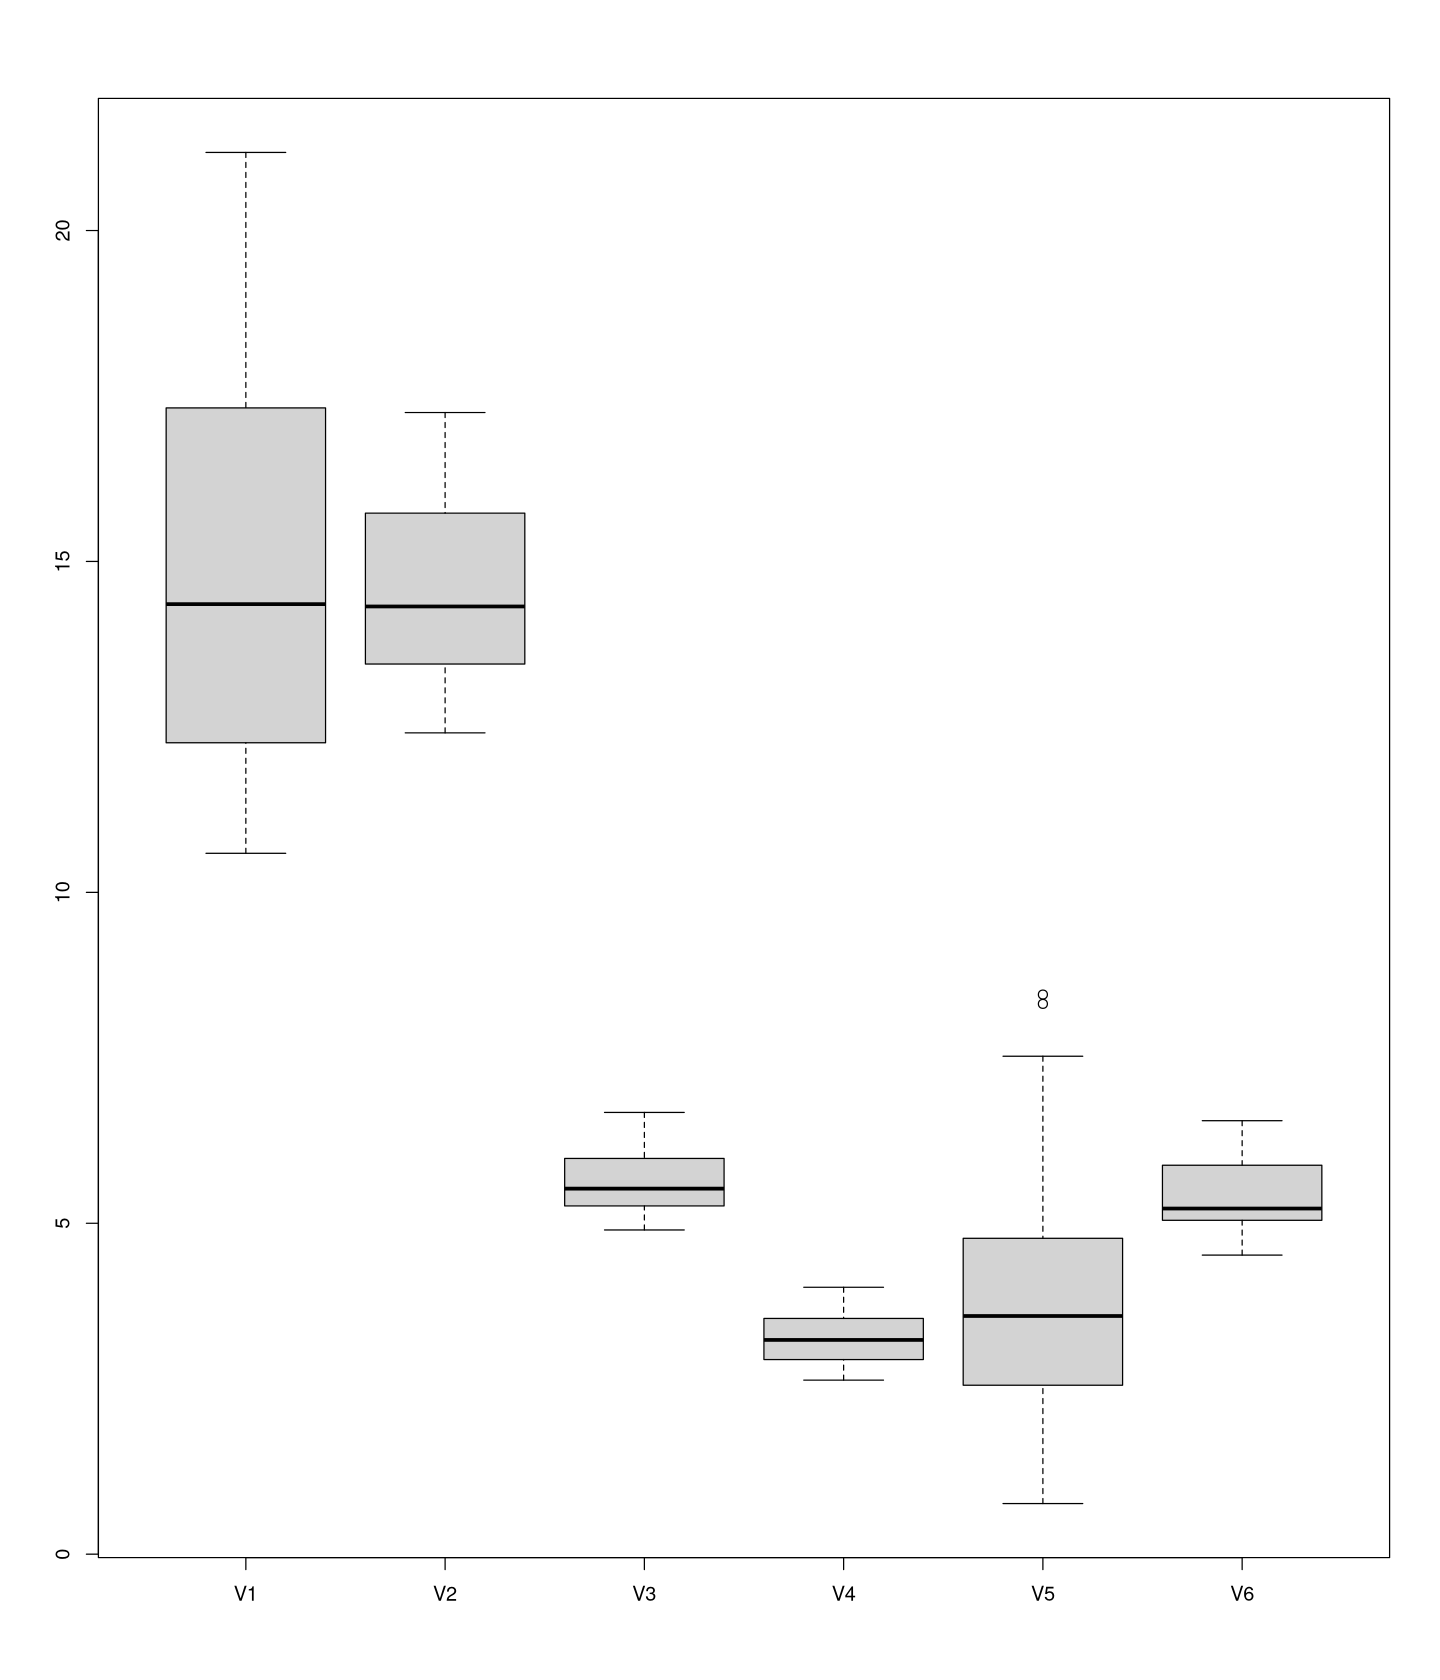

In [17]:
library(cluster)
library(ggplot2)
library(corrplot)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")

print(datos[1:10,])
summary(datos)
boxplot(datos)

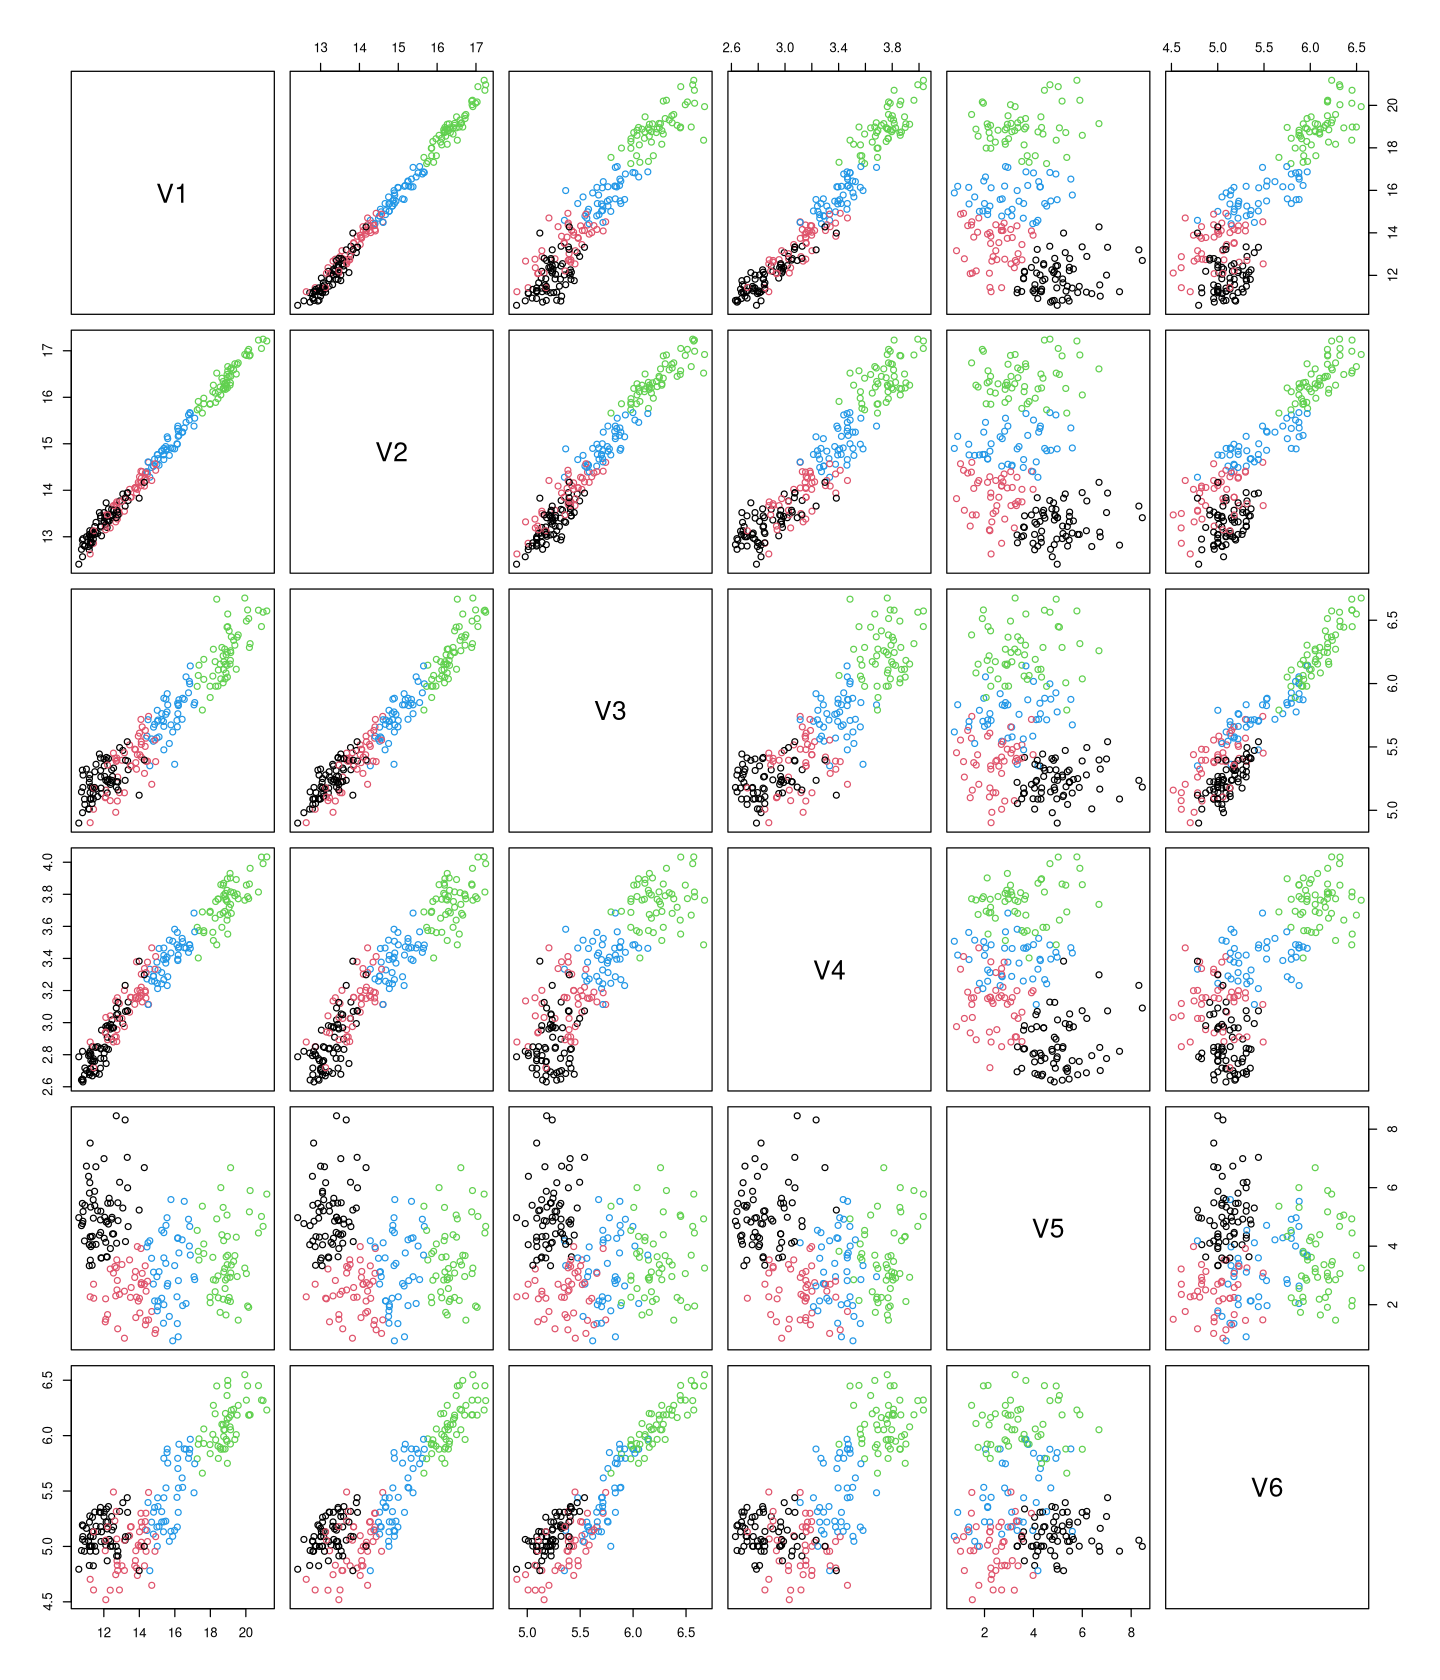

In [18]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 2,3 o 4 grupos con el algoritmo KMeans, se obtienen grupos bastante bien diferenciados por las variables area, perimetro longitud de las semillas. Las tres últimas variables tienen valores con mayor nivel de confusión entre los grupos definidos por kmeans.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,-2.1376924,-0.7392228,-0.11677986,-0.03800567,-0.0009242843,0.005265824
2,-1.1731198,1.0501576,0.10256003,0.05800065,-0.0041432679,0.001410480
3,3.0936321,-0.2499533,-0.04446158,-0.04386905,0.0115749668,0.013458399
4,0.6362517,0.3177031,0.12251442,0.05021075,-0.0084876163,-0.025890456


K-means clustering with 4 clusters of sizes 66, 46, 54, 44

Cluster means:
        V1       V2       V3       V4       V5       V6
1 11.91439 13.26152 5.231227 2.863939 5.068288 5.105348
2 13.39109 13.86522 5.366000 3.114283 2.415804 4.990674
3 18.96296 16.39667 6.242722 3.749926 3.540333 6.100778
4 15.71909 14.97659 5.745182 3.398500 3.187045 5.448386

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  4   3   4   1   4   2   4   2   3   2   1   4   4   4   3   1   1   4   4   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   3   4   1   1   4   1   2   2   3   4   2   1   4   3   3   3   1   4   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   1   3   2   1   3   3   1   1   1   3   2   4   1   4   2   4   4   3   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   3   2   4   3   2   3   4   3   1   3   2   4   3   

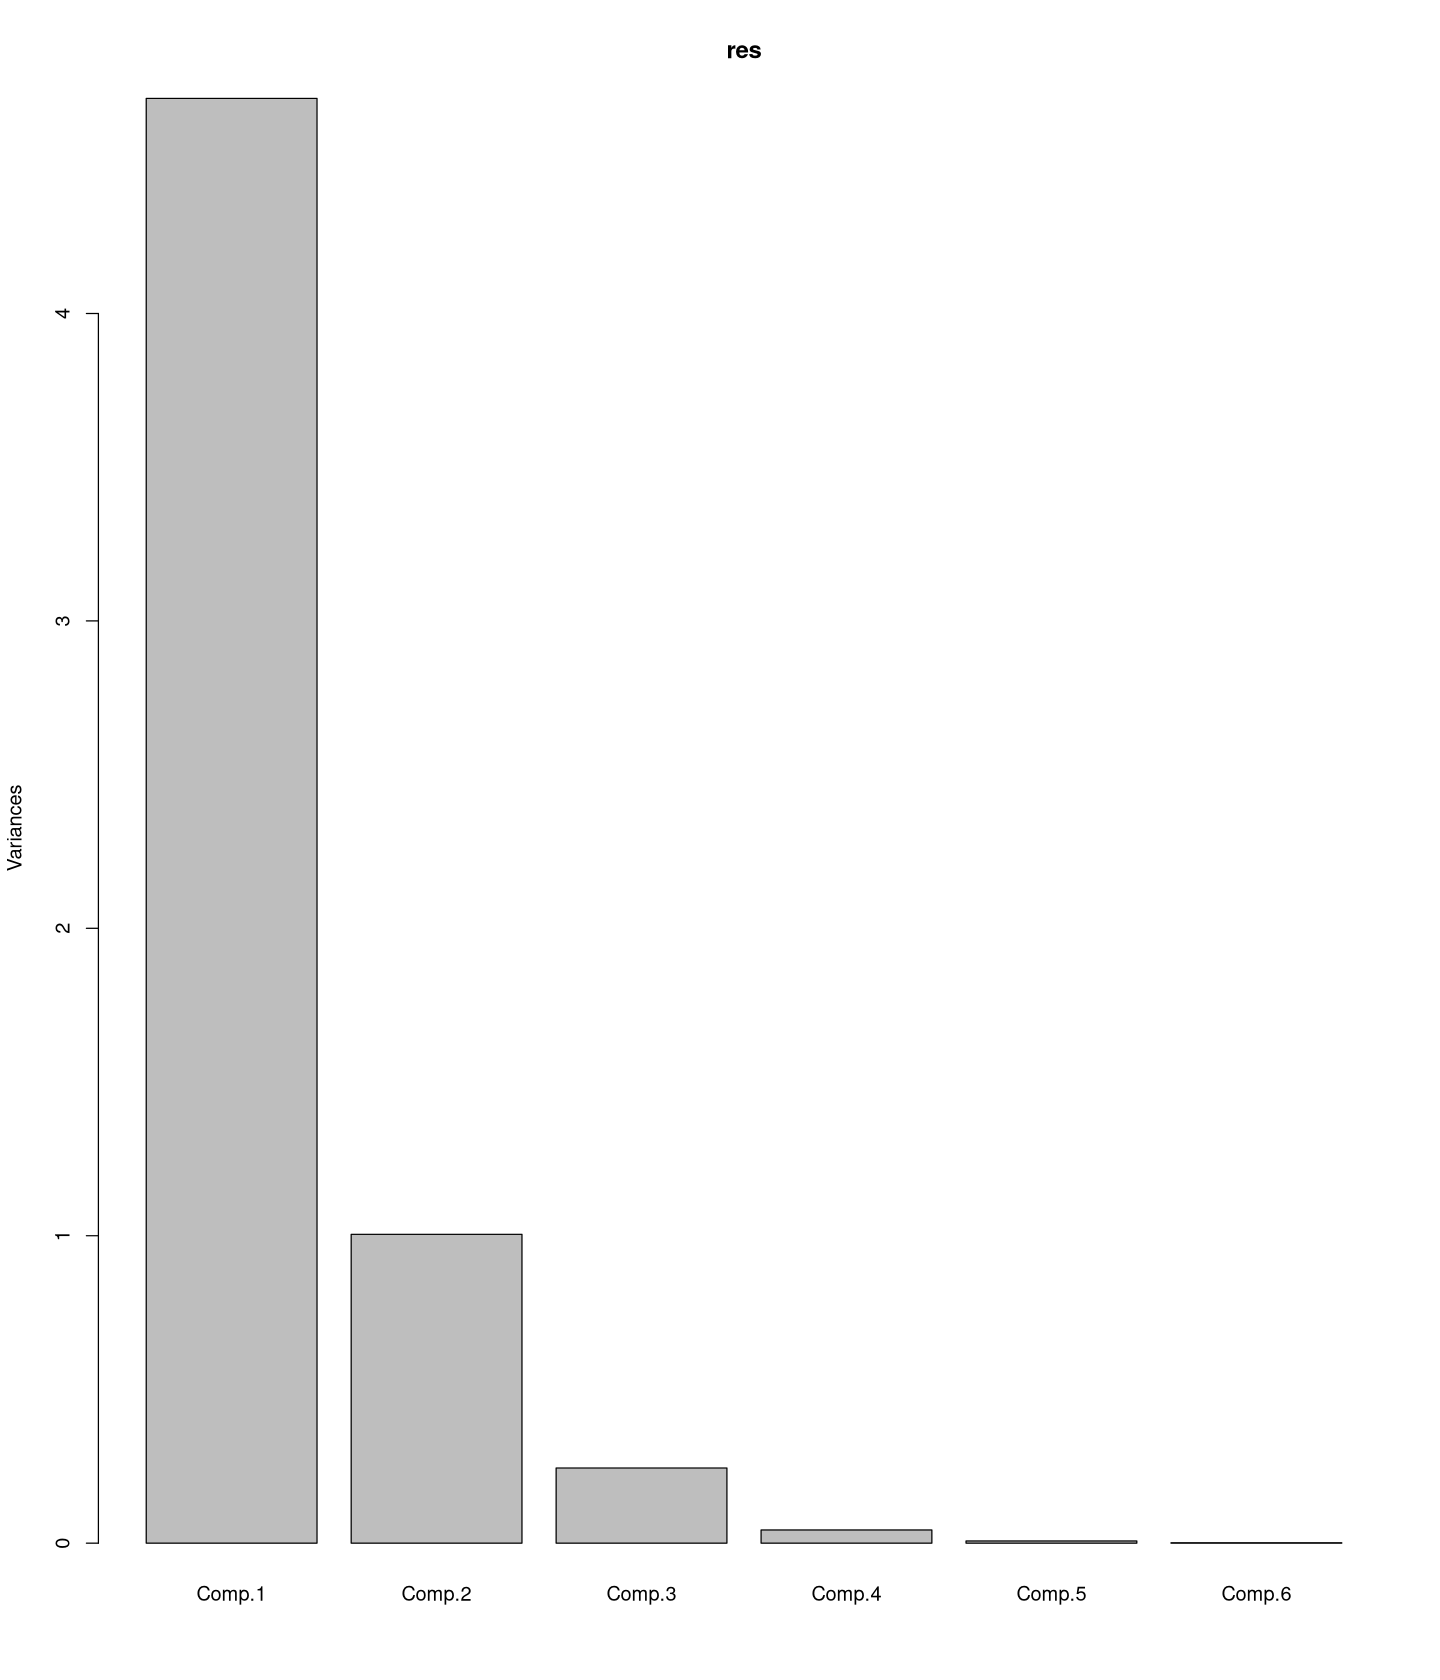

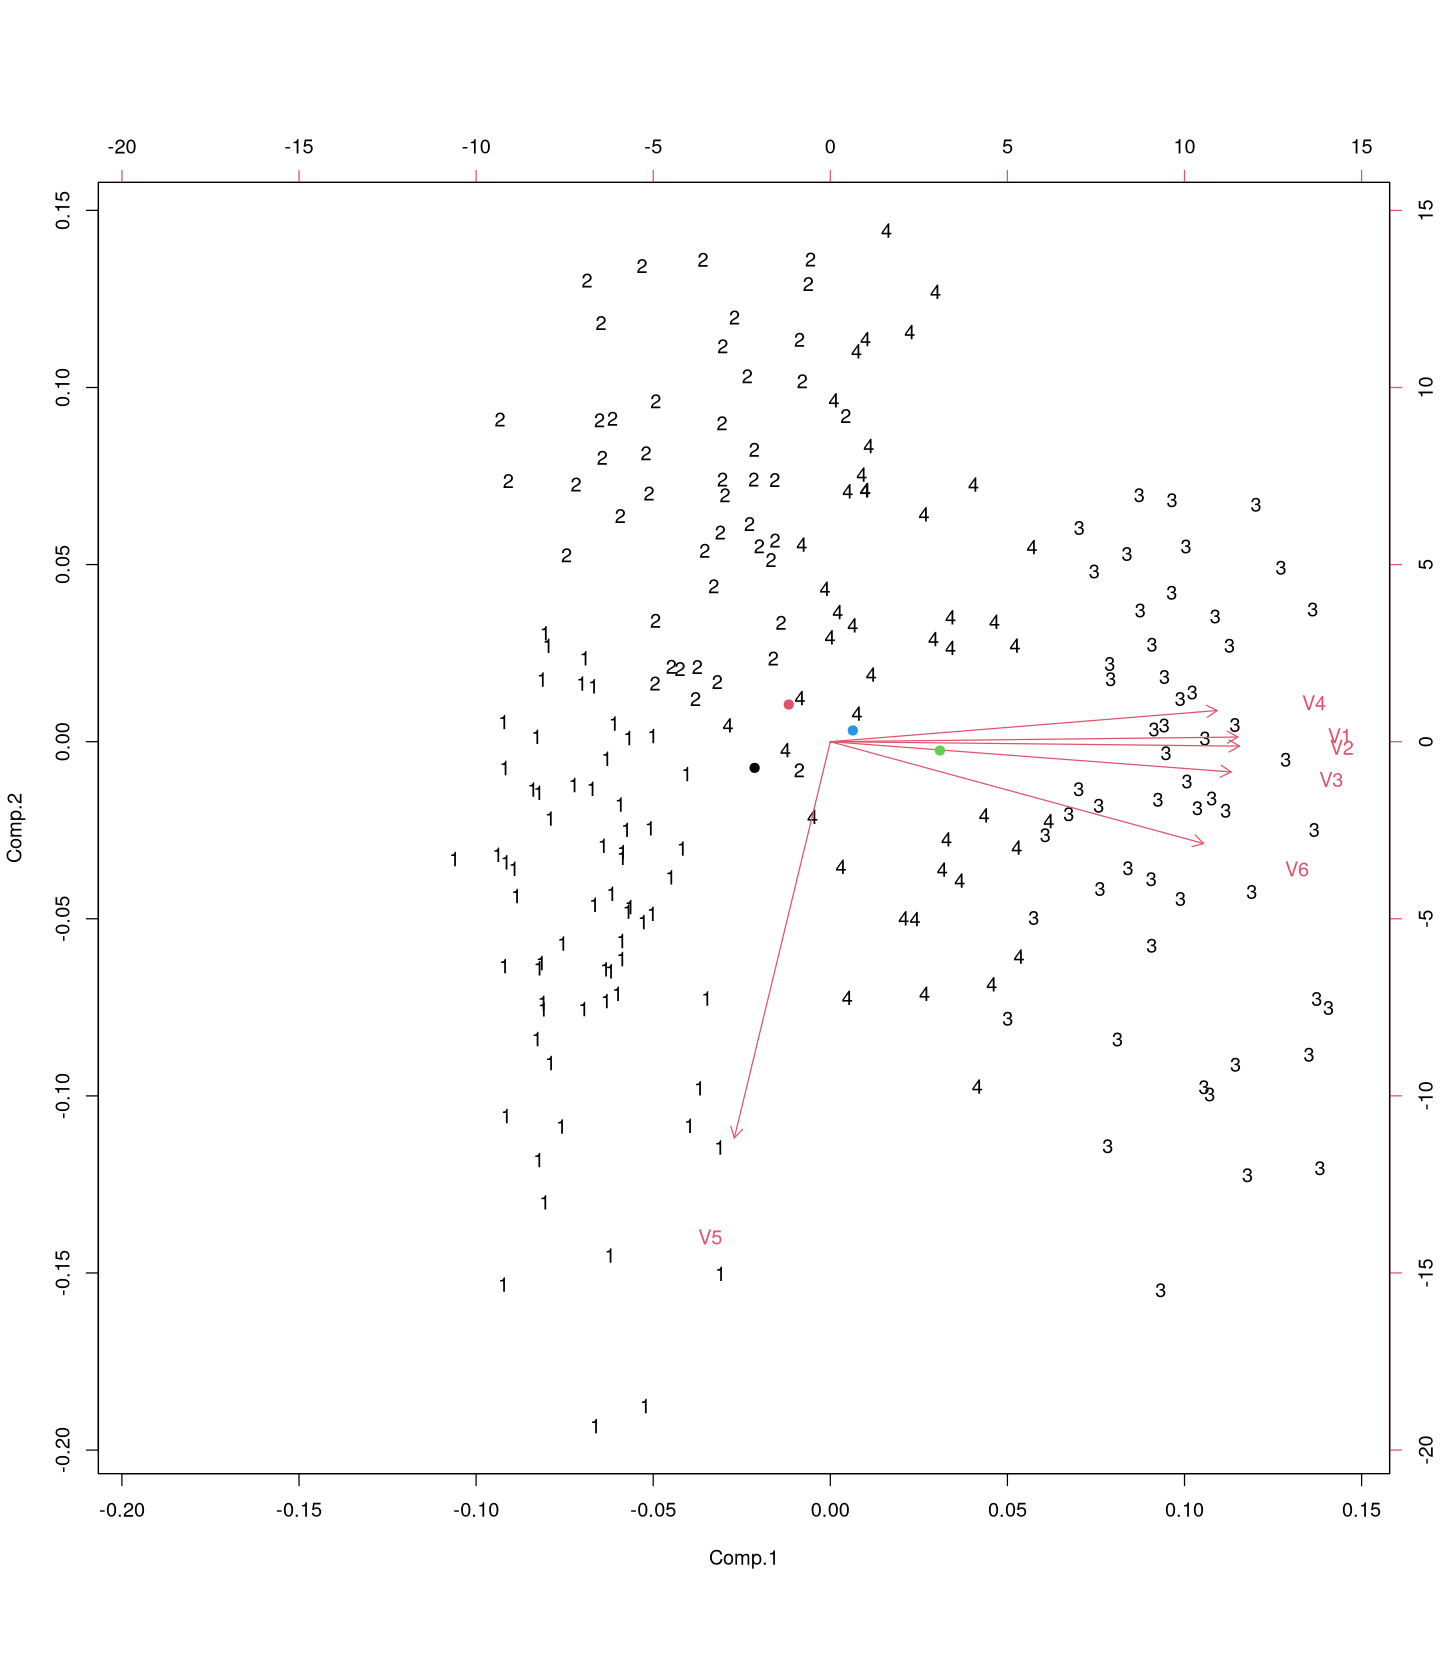

In [19]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 2 representa a las semillas con mayores valores de todas las variables excepto V5, el coeficiente de simetría. El grupo 1 representa las semillas con valores intermendios de las distintas variables  y los grupos 3 y 4 con los menores valores. Se distinguen el grupo 3 del 4 por sus mayores valores de V5 el coeficiente de simetría. 


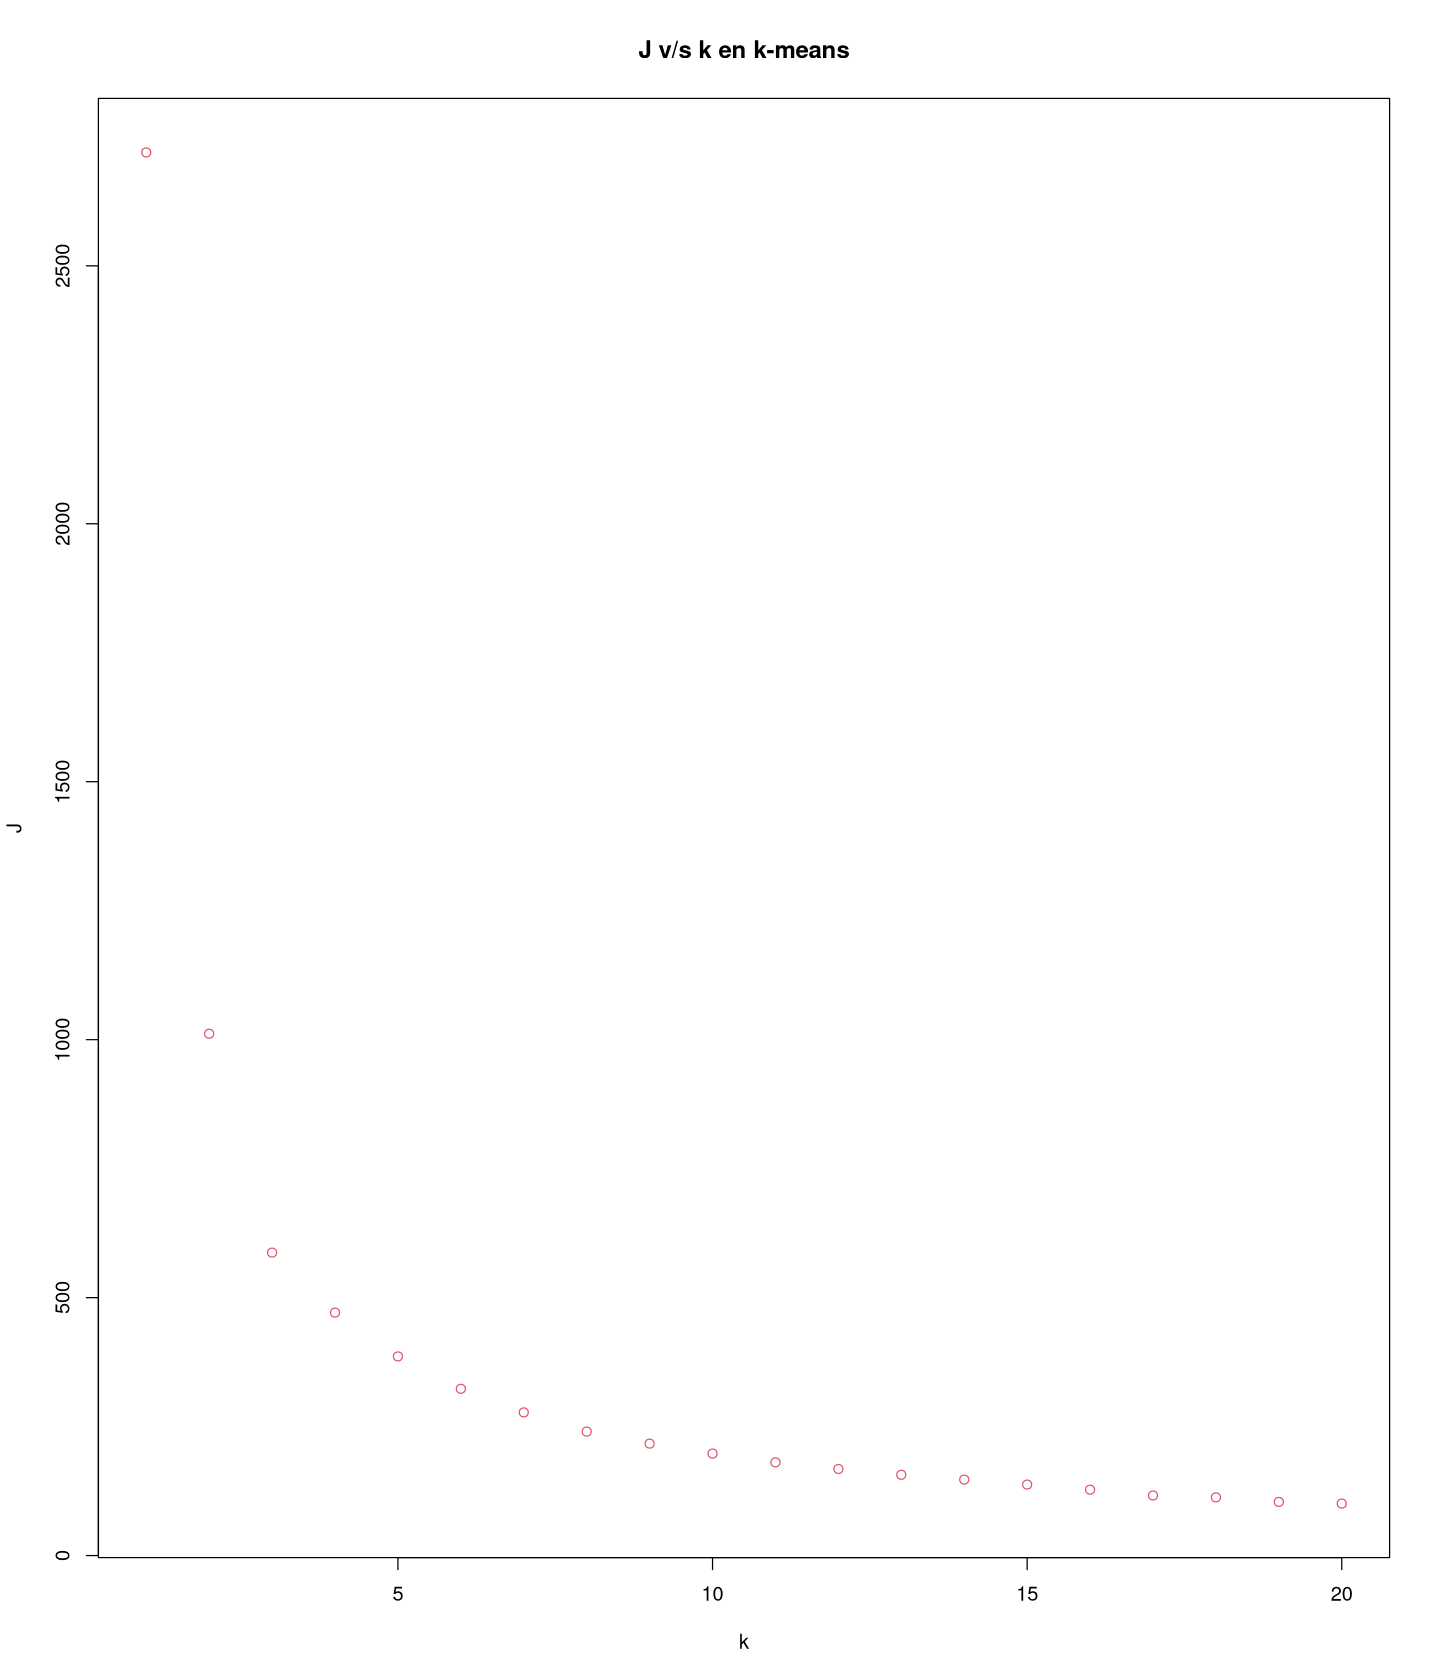

In [20]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(2,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 1:

1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Explique su decisión.
2. Realice nuevamente los cálculos con el K óptimo y  caracterice los grupos obtenidos. Interprete sus resultados

<h3> Desarrollo ejercicio 1.1 </h3>

Observando el grafico podemos notar que hay un "codo" en el valor de k=3, punto en donde el decremento de la suma cuadrada de las distancias ya no es tan significativo como lo era en los valores anteriores. Por lo tanto, podemos decir que k=3 es el valor de K mas apropiado utilizando el algoritmo k-means.

<h3>Desarrollo ejercicio 1.2</h3>

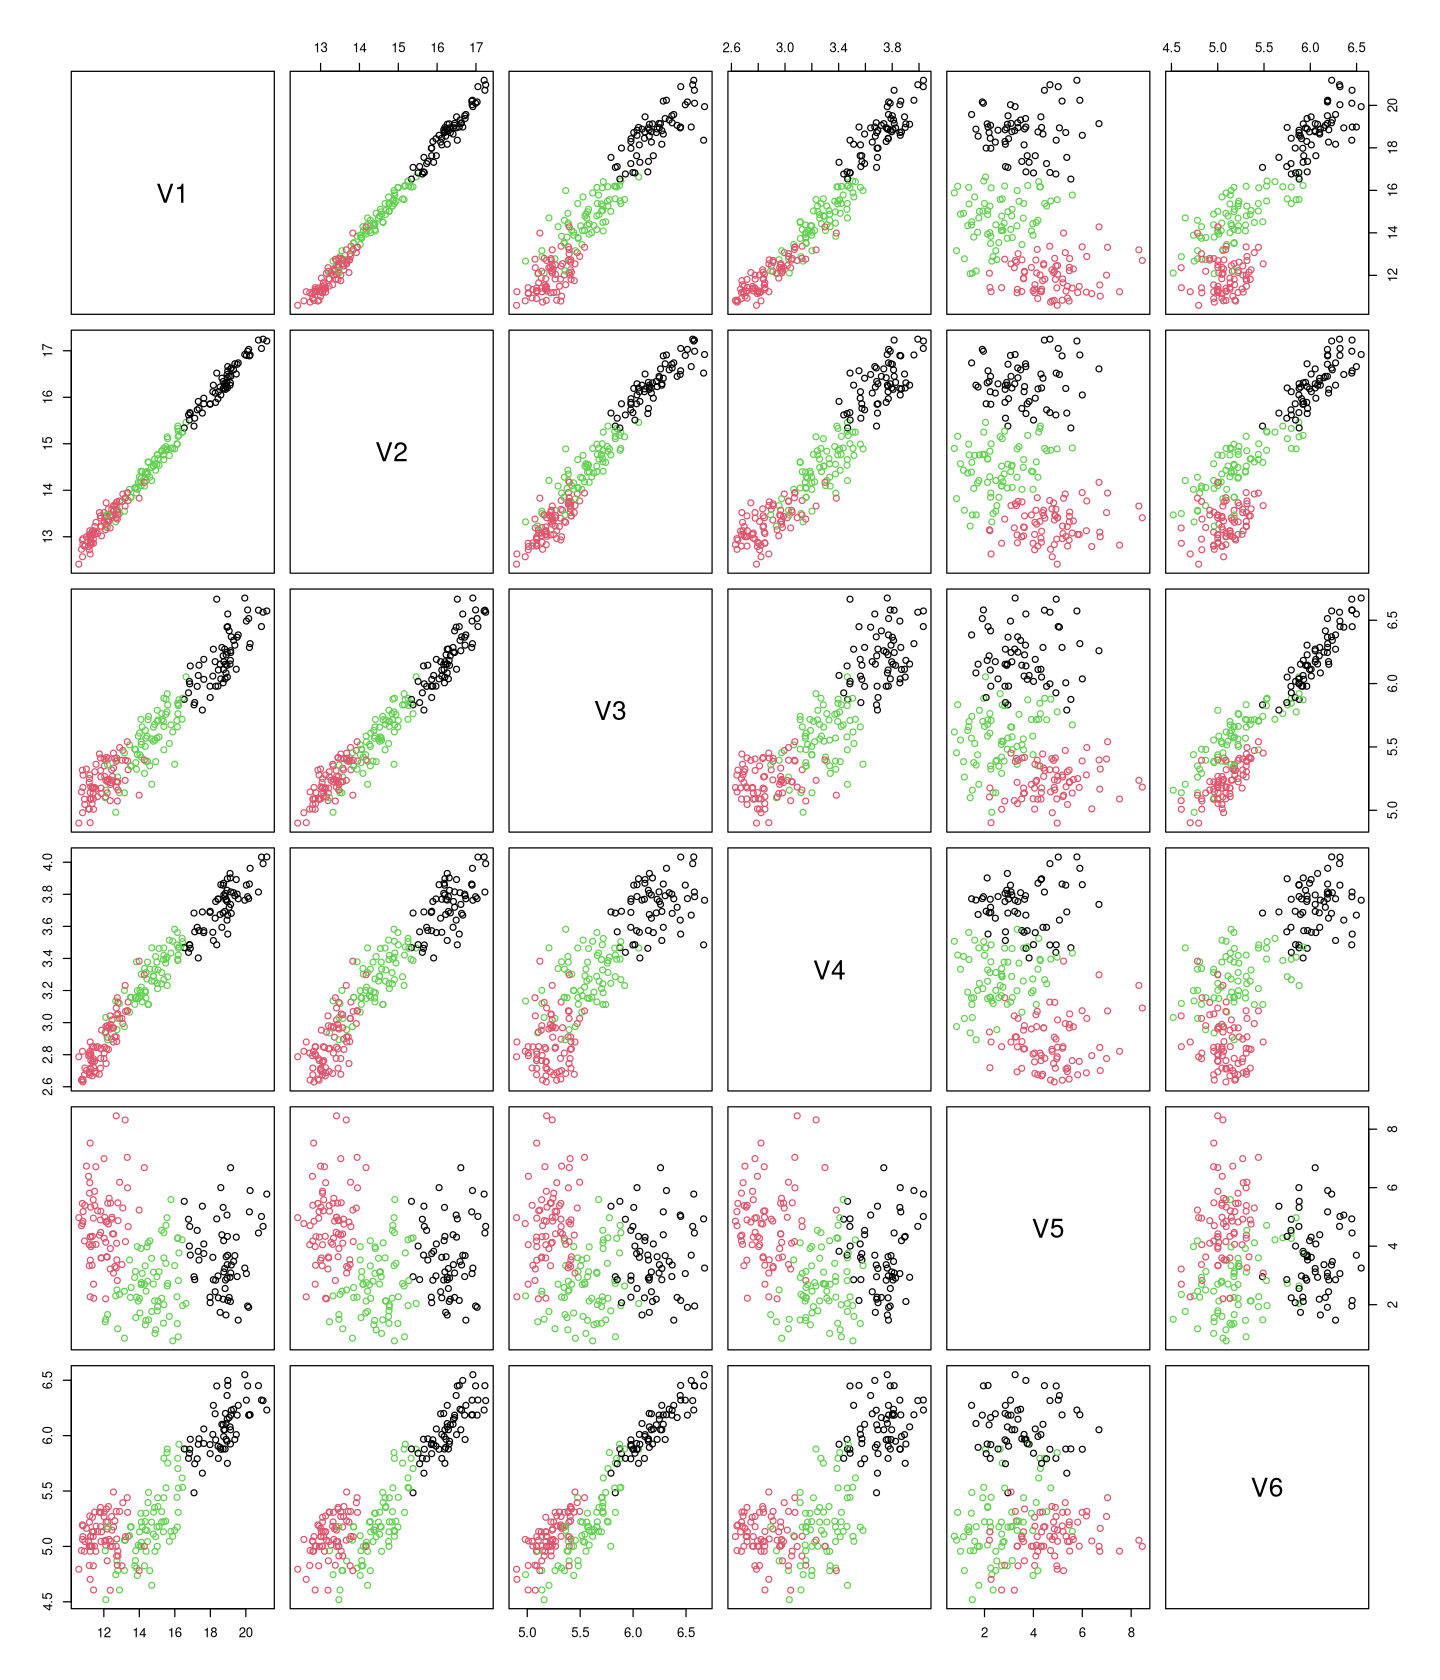

In [21]:
#Recalculo con el K-OPTIMO
#ingresa el valor de k-OPTIMO
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
pairs(datos,col=cl$cluster)

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,2.9205042,-0.2730151,-0.03930464,-0.04246970,0.010152392,0.007972724
2,-2.1089388,-0.5304285,-0.12243032,-0.04130075,0.002155313,0.007683248
3,-0.2189232,0.7985683,0.16423218,0.08015012,-0.010906320,-0.014971476


K-means clustering with 3 clusters of sizes 61, 77, 72

Cluster means:
        V1       V2       V3       V4       V5       V6
1 18.72180 16.29738 6.208934 3.722672 3.603590 6.066098
2 11.96442 13.27481 5.229286 2.872922 4.759740 5.088519
3 14.64847 14.46042 5.563778 3.277903 2.648931 5.192319

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   1   3   2   3   3   3   3   1   3   2   3   3   1   1   2   2   3   3   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   3   2   2   1   2   3   3   1   3   3   2   3   1   1   1   2   3   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   1   3   2   1   1   2   2   2   1   2   3   2   3   3   1   3   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  3   1   2   3   1   3   1   3   1   2   1   3   3   1   3   1   3   1   3   1 
 81  82  83  84  85  86  87  88  89  

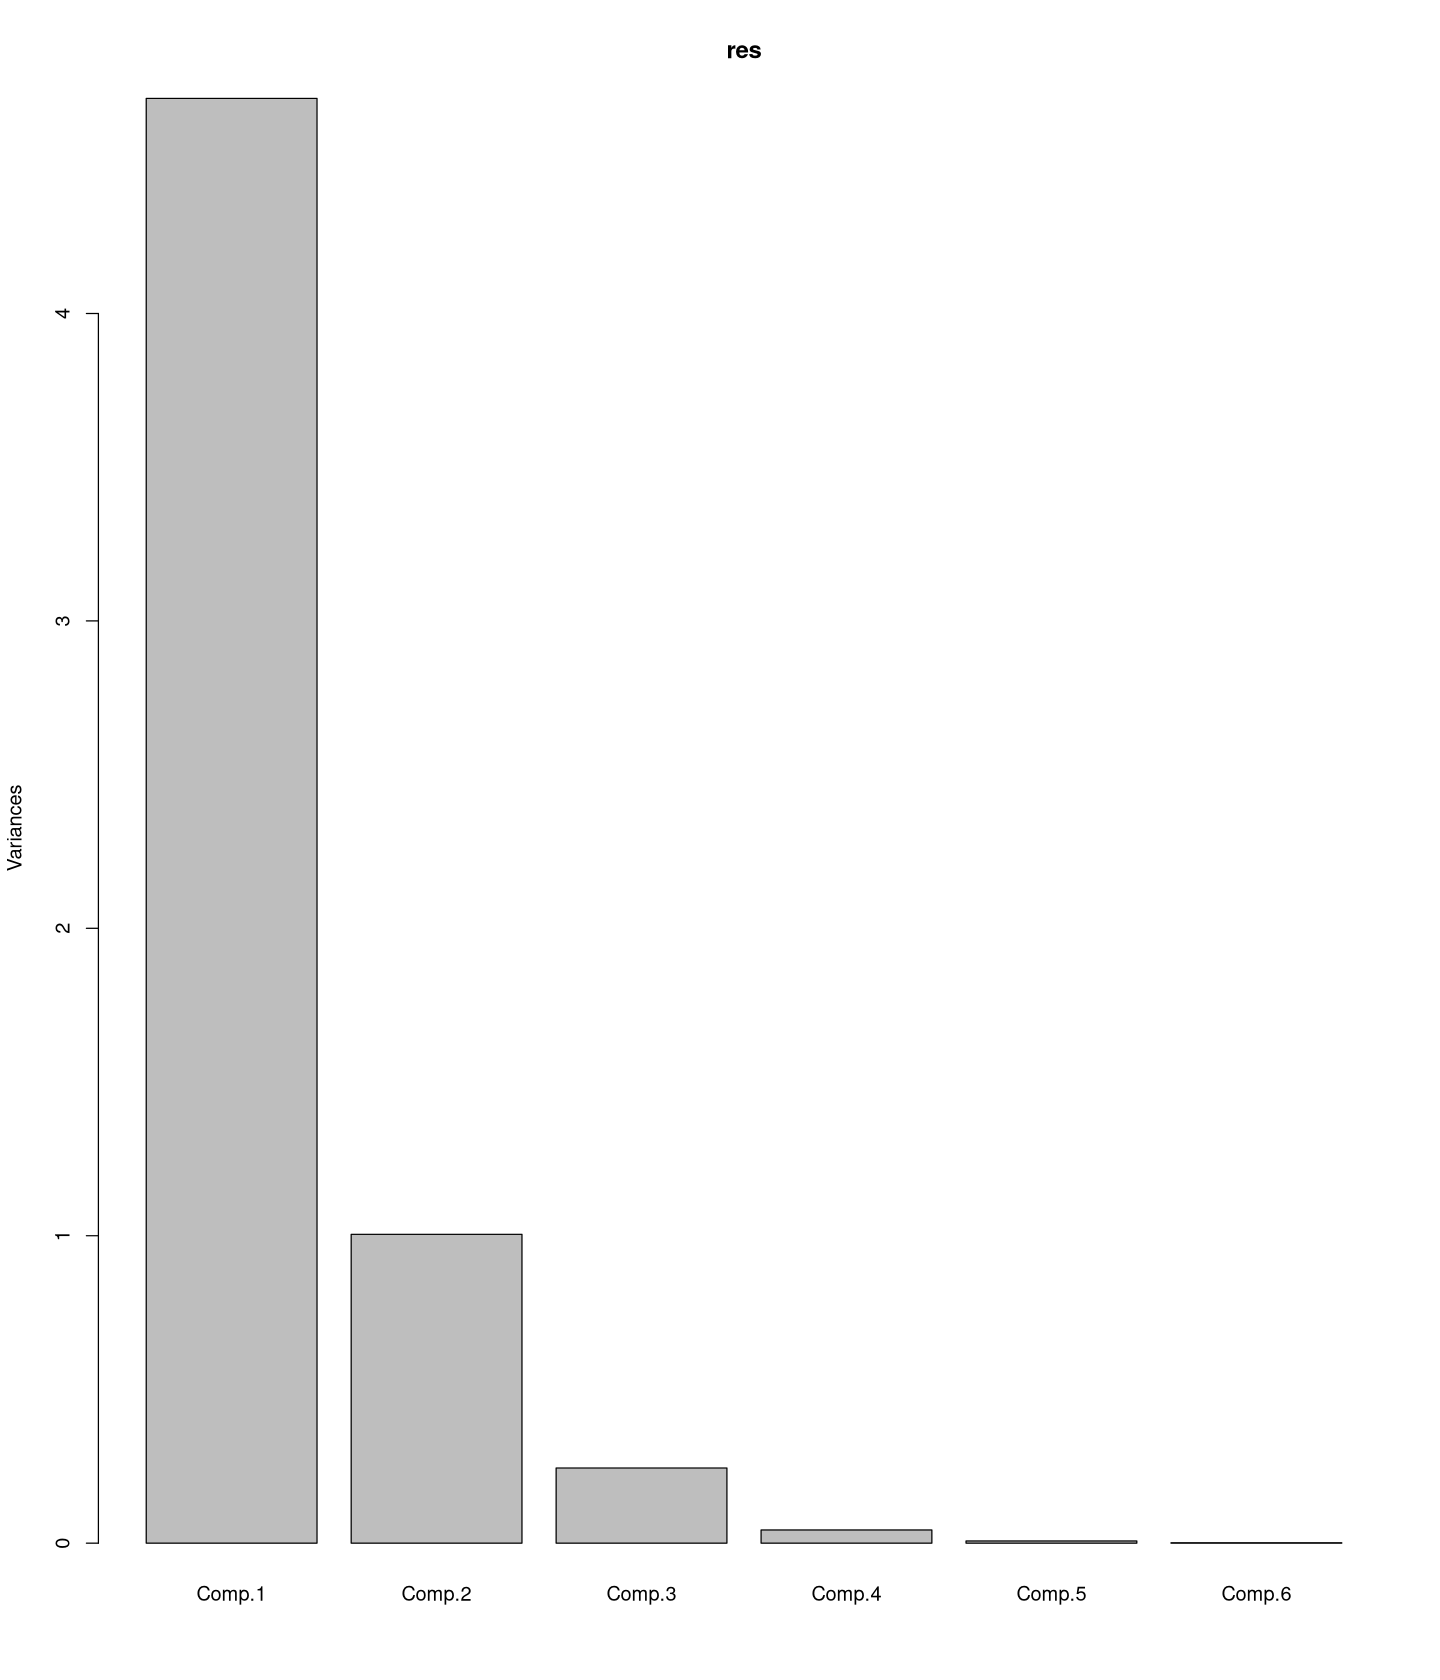

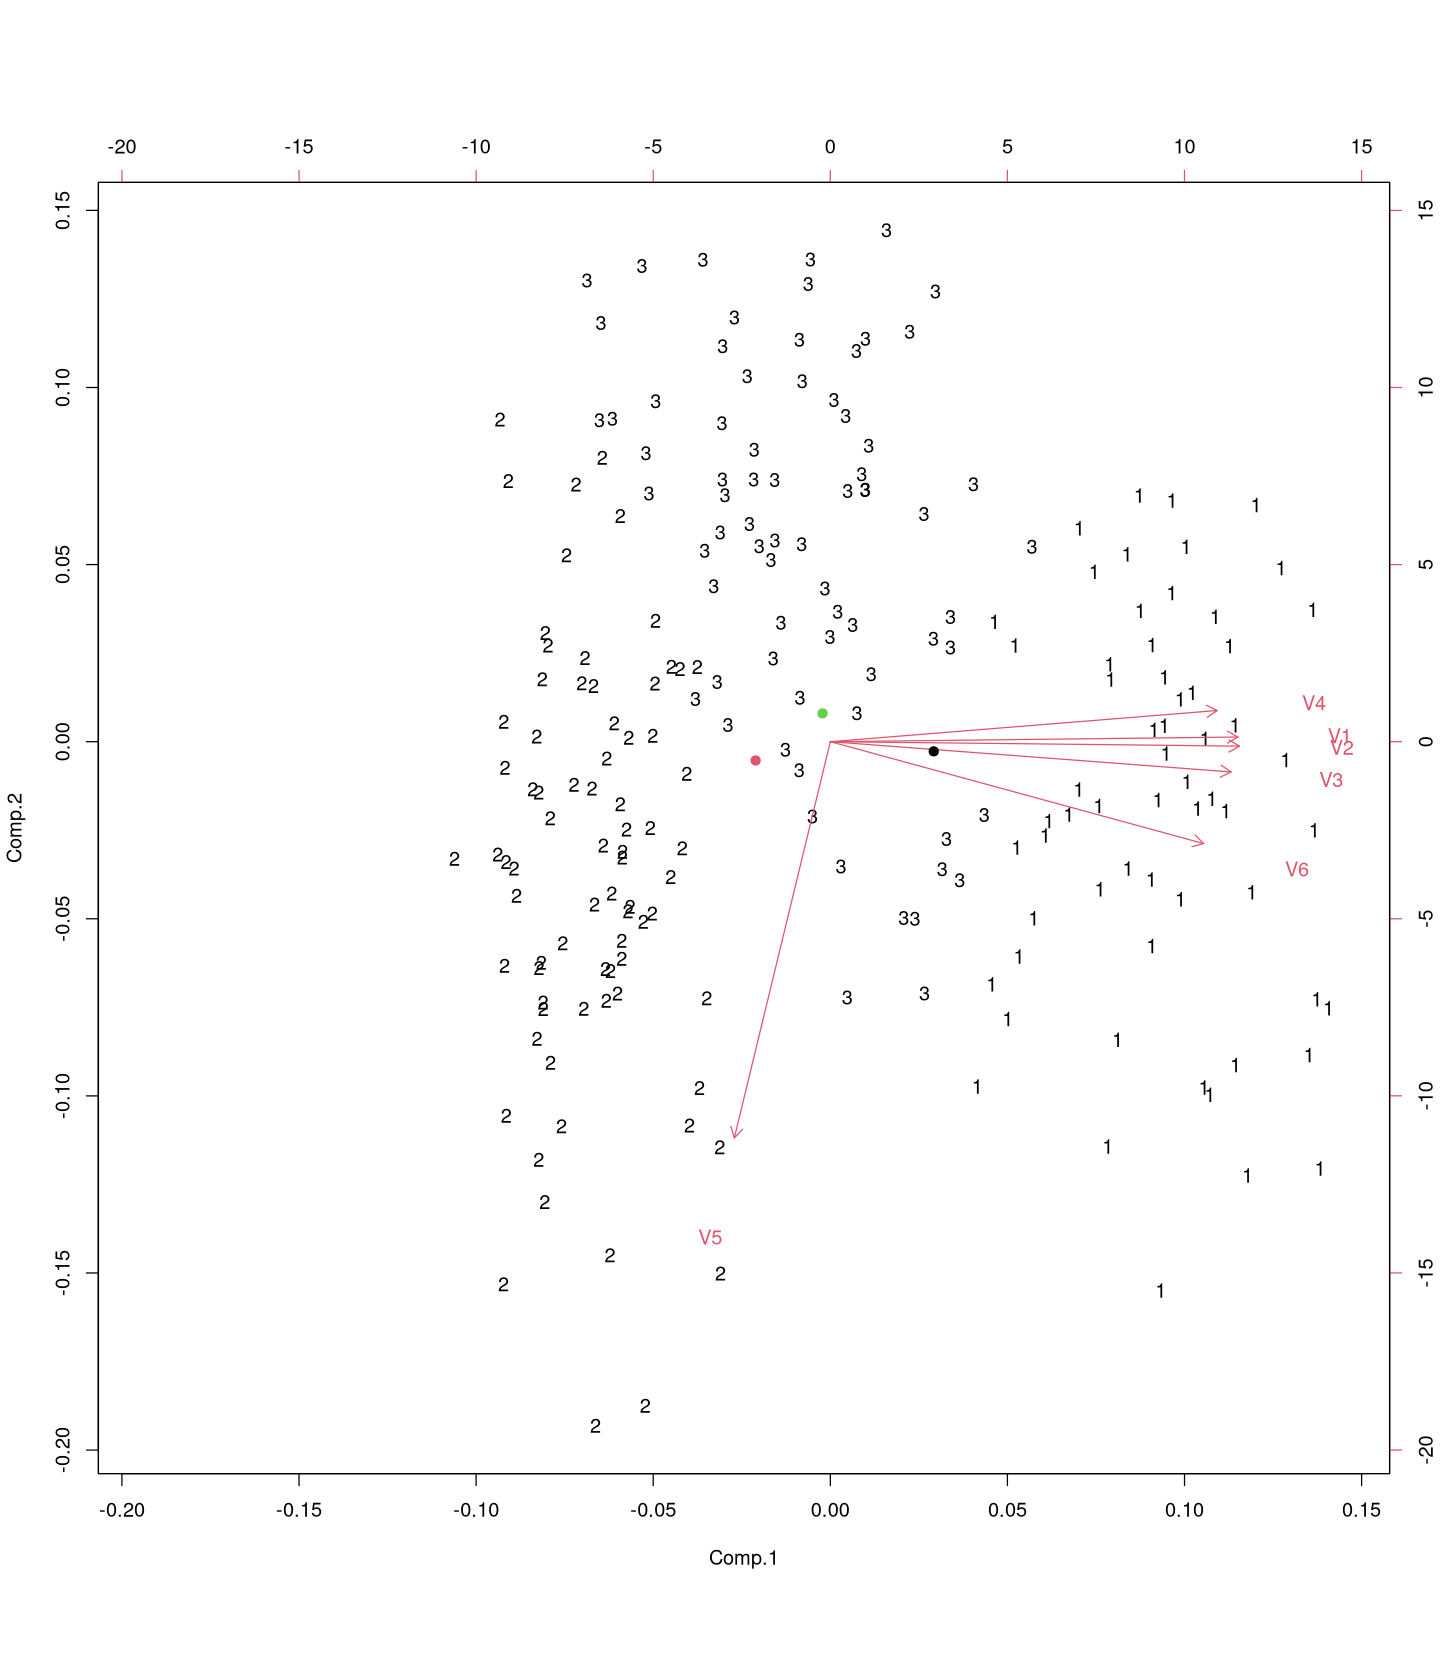

In [22]:
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
points(res2[,1:2],col=1:k0,pch=19)


<h2> Analisis de los grupos:</h2>

Considerando K-means clustering with 3 clusters of sizes 72, 77, 61 (Tamaño de los clusters bastante equilibrado) respectivamente

-Grupo 1 (n=72): Este grupo tiene valores medios relativamente bajos en las variables V1,V3,V4 y V6, y valores medios intermedios en V2 y V4.

-Grupo 2 (n=77): Este grupo tiene valores medios bajos en V1, V2, V3, V4 y V6, y especialmente alto (mas alto) en V5.

-Grupo 3 (n=61): Este grupo tiene valores medios altos en casi todas las variables, con valores especialmente altos (mas altos) en V1, V2, V3, V4 y V6 y valor medio intermedio en v5.

Los resultados indican que el Grupo 2 se diferencia de los otros dos grupos debido a su valor excepcionalmente alto en la variable V5, mientras que el Grupo 3 tiene valores medios altos en casi todas las variables, lo que sugiere que este grupo tiene un perfil generalmente alto. Por otro lado, el Grupo 1 tiene valores medios relativamente bajos en varias variables, lo que sugiere que este grupo tiene un perfil generalmente bajo en comparación con los otros grupos.

## Otras alternativas de cálculo

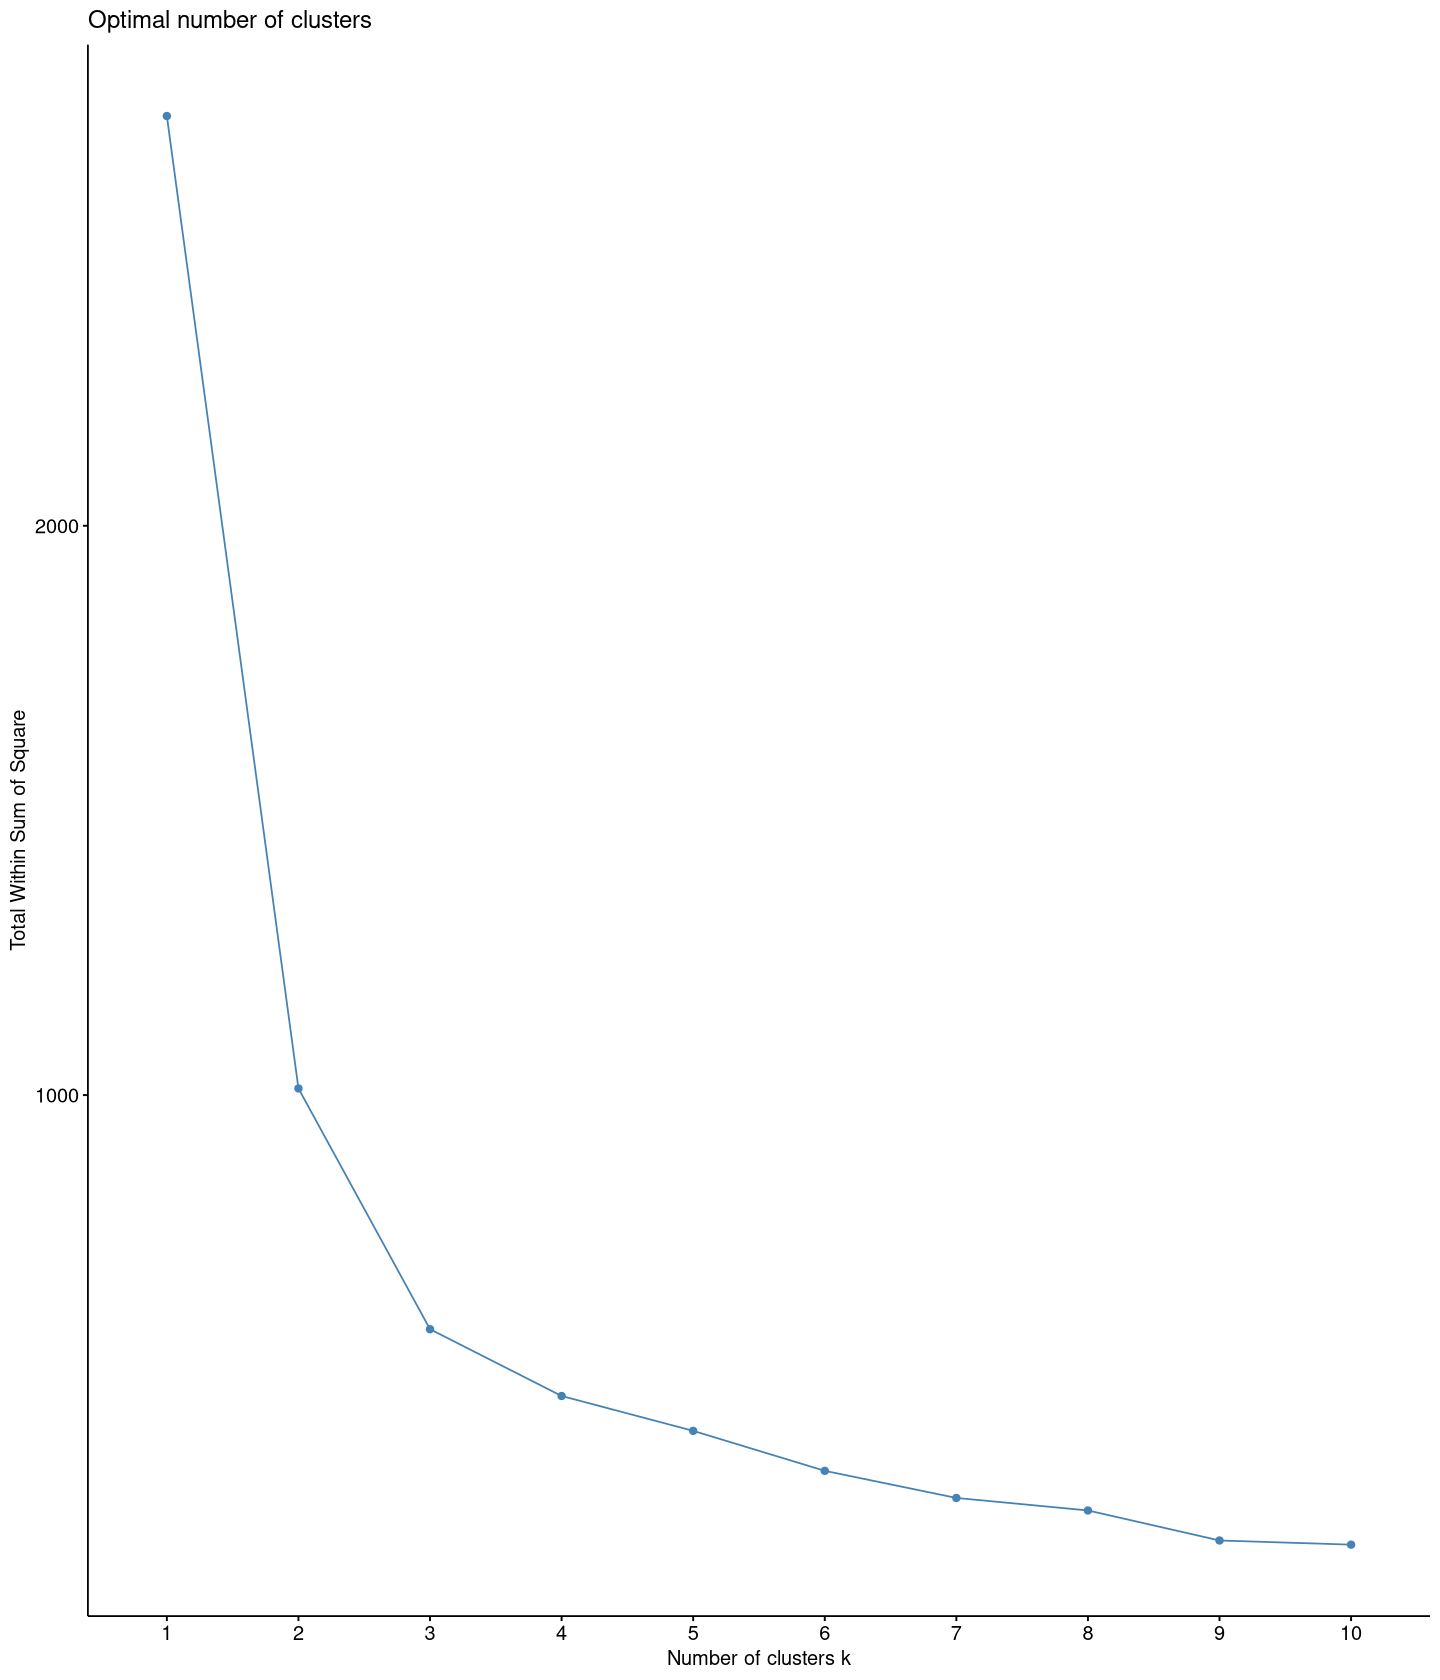

In [23]:
library(cluster)
library(factoextra)
df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")


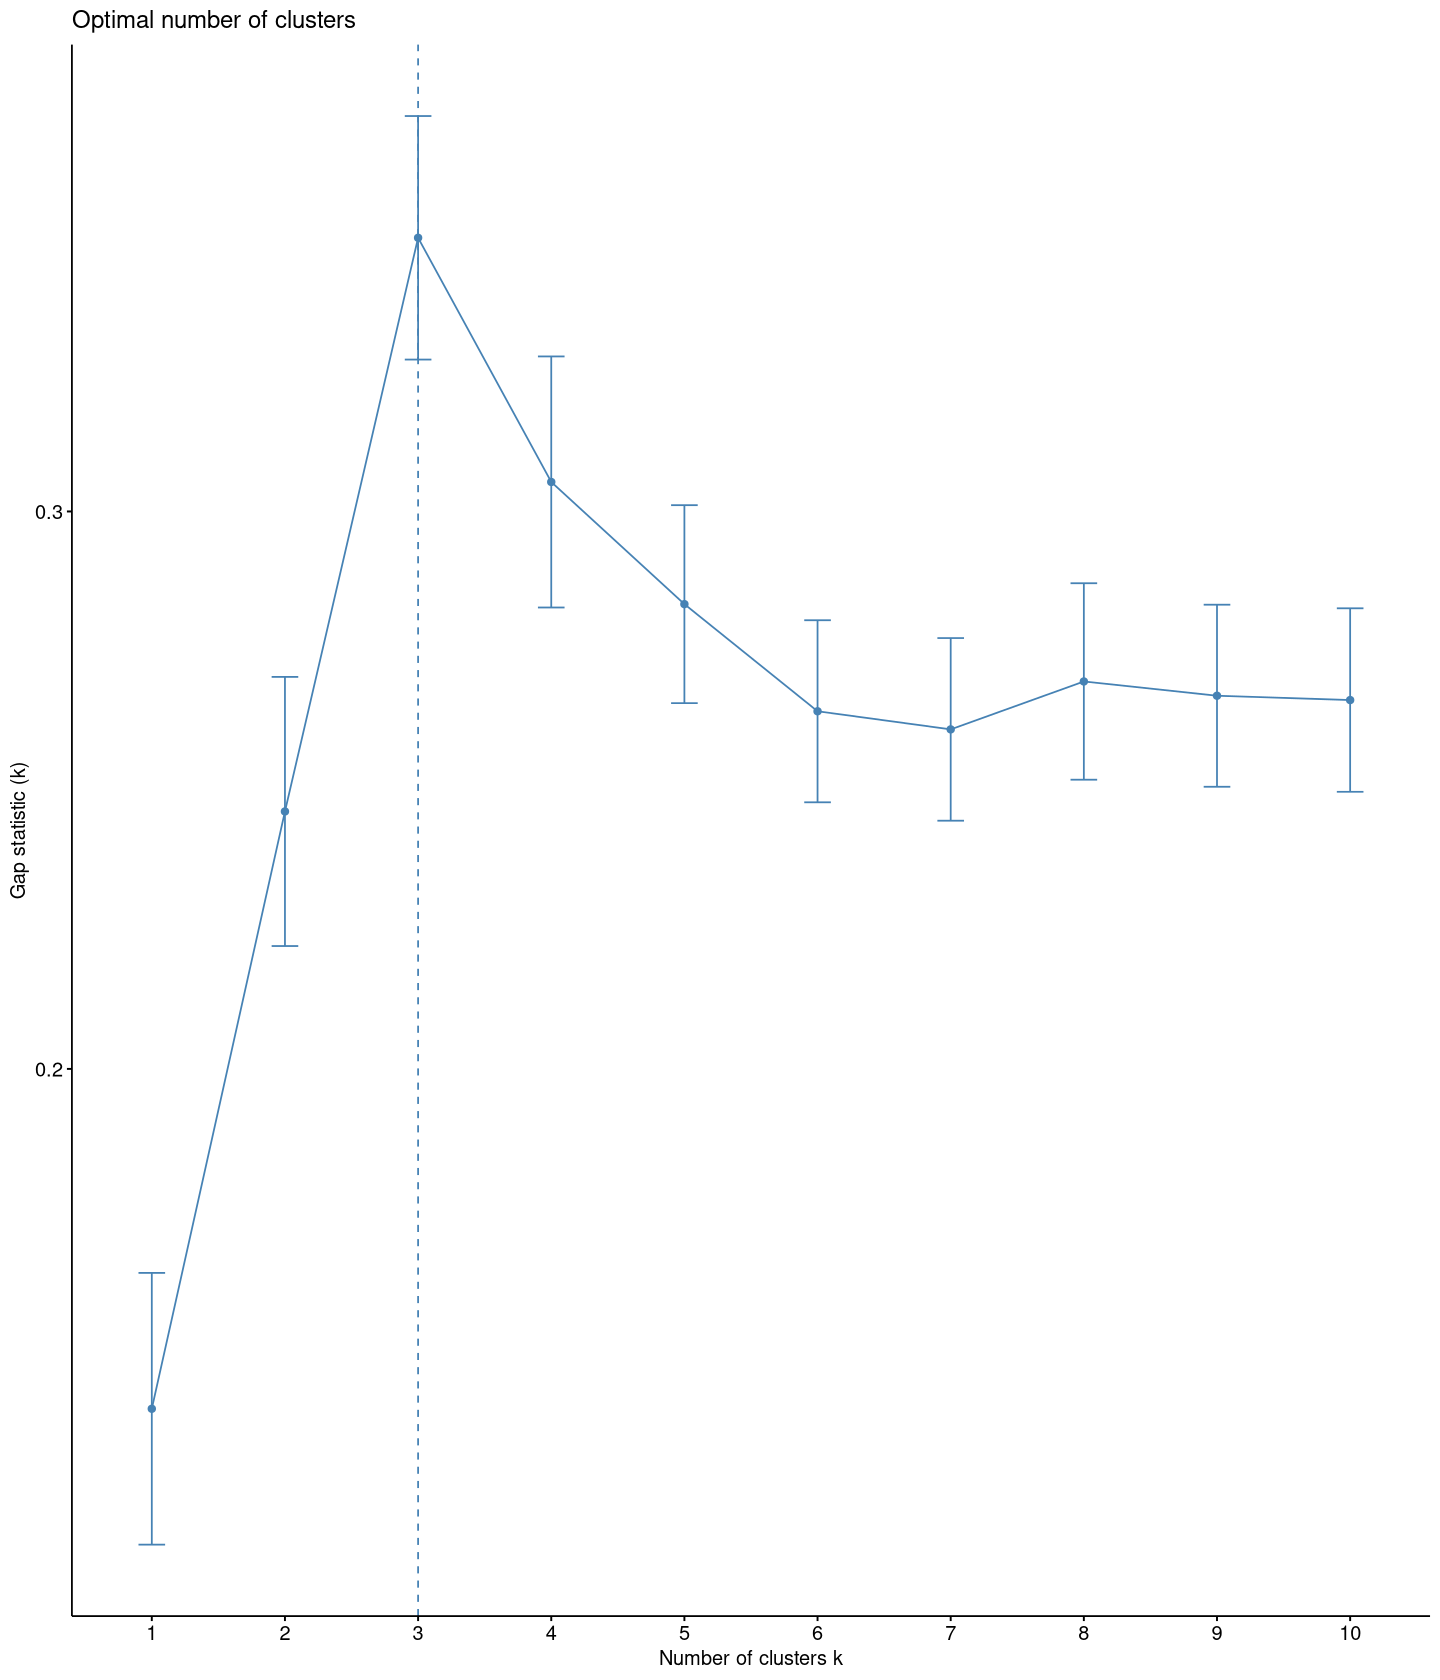

In [24]:
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

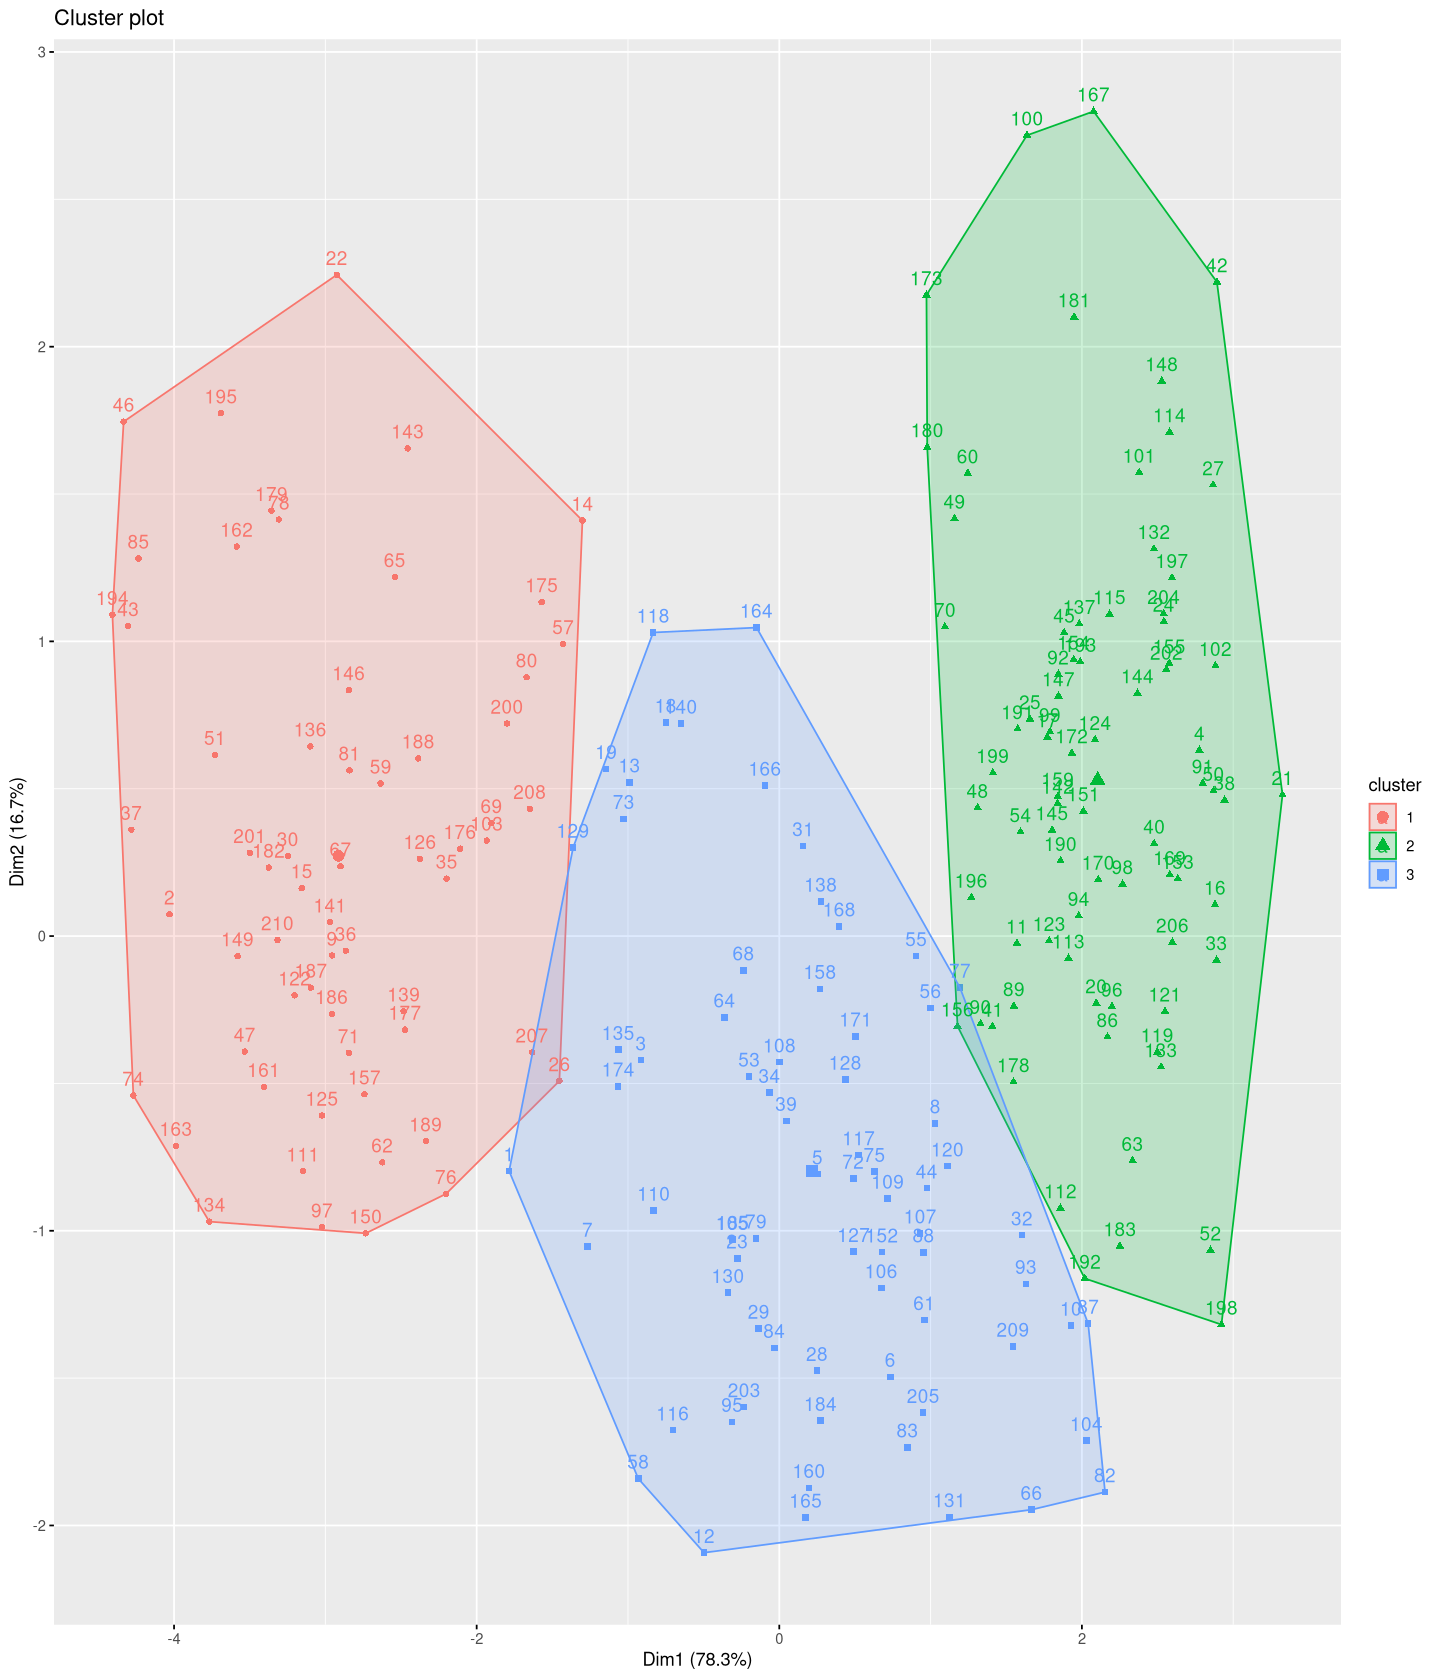

In [25]:
fviz_cluster(cl, df)

### Ejercicio 2:
Realice un análisis de clustering con un subconjunto de datos de datosComunas.csv (puede escoger variables (al menos 5) y comunas (al menos 30) indicando el criterio utilizado en su elección.

1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [26]:
datosC <- read.csv("..//data//datosComunas.csv" ,header=TRUE,sep=";", dec=",")

<h3>Desarrollo ejercicio 2.1 </h3>
<ol>
    <li>Acceso a servicios y equipamientos públicos básicos</li>
    <li>Mejor acceso a movilidad sustentable</li>
    <li>Mejor calidad del medio ambiente urbano</li>
    <li>Mayor integración social y calidad de barrios y viviendas</li>
    <li>Más y mejor planificación de ciudades y regiones</li>
    <li>Mayor crecimiento económico inclusivo y sostenible para el desarrollo urbano</li>
</ol>
<p>
Son datos que indican que tan bueno es el desarrollo urbano y que tan facil es acceder a servicios básicos (salud, educación, areas verdes). También se describe la cantidad de accidentes de transito cada 100.000 habitantes. Hay datos de sustentabilidad ambiental, estos indican la generación de residuos y el consumo de energia por persona, además se indica el porcentaje de la comuna que esta cubierta por vegetación, este valor debe indicar cuanto bosque o selva hay en cada comuna, es muy importante evaluar esta dato, tiene ralación además con la cantidad de areas verdes (plazas o parques) que se pueden encontrar en la comuna. En el punto 4 se detallan en gran parte indicadores de calidad de las viviendas, hacinamiento y precariedad en la que viven las personas, adempás de un indicador de pobreza y seguridad ciudadana, este ultimo podria tener relación con la cantidad de accidentes de transito. El punto 5 es un indicador de la inversion que realiza el estado a la comuna, este indicador se deberia relacionar bien con todos, ya que de la inversion del estado depende gran parte del crecimiento comunal, p.e. se relaciona muy bien con la calidad de las viviendas, seguridad ciudana y con el porcentaje de la población comunal que vive en la pobreza. En el punto 6.E1 <a href="https://obtienearchivo.bcn.cl/obtienearchivo?id=repositorio/10221/28638/1/BCN_FCM_ingresos_y_distribucion_GD_def.pdf">FCM</a>: Este fondo es definido por la Constitución Política como un “mecanismo de redistribución solidaria de los ingresos propios entre las municipalidades del país”, su función es disminuir las desigualdades intermunicipales. Las comunas con mayores ingresos aportan más a este fondo (Santiago, Providencia, Las Condes y Vitacura). Un municipio con mayores ingresos puede generar más trabajos, con ello bajar los indices de pobreza y mejorar el acceso a vivienda, también puede mejorar su insfractura ecológica.
</p>

1. Primero vamos ver la correlacion existente entre las variables. 

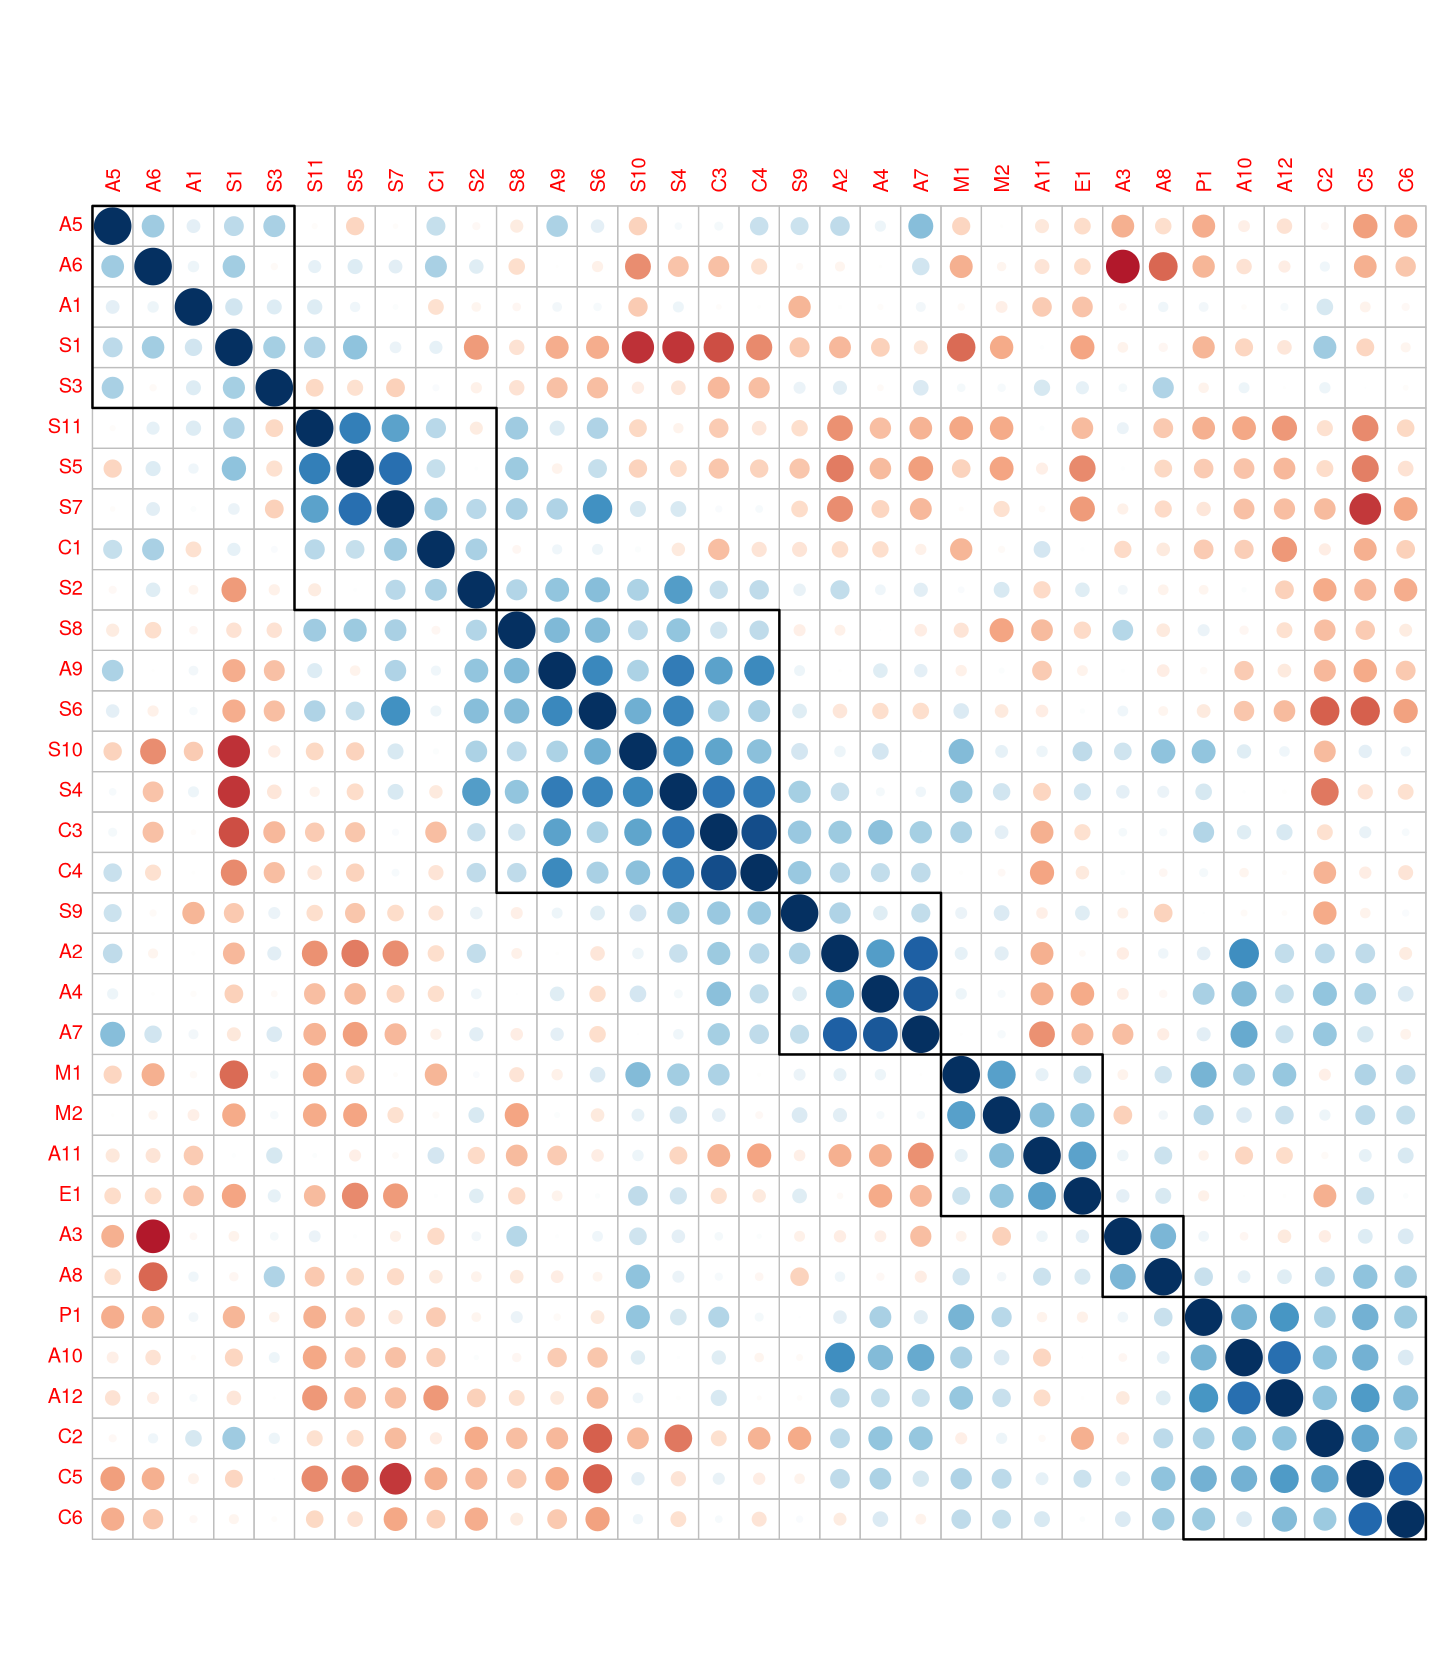

In [27]:
options(repr.plot.width = 12, repr.plot.height =14)
data_matrix <- as.matrix(datosC[1:30,2:34])
cor_matrix <- cor(data_matrix)
#addrect, cantidad de rectangulos agrupadores
#cl.pos barra de temperatura
corrplot(cor_matrix, method = "circle", order = "hclust", addrect = 7,  cl.pos = "n")


En el grafico anterior podemos ver las relaciones entre las varibles, dentro de cada rectangulo de contorno negro agrupamos las varibles con mayor corelacion entre si, tenemos dos conjuntos: G1 = {S8, A9, S6, S10, S4, C3, C4} y G2 = {P1, A10, A12, C2, C5 ,C6}. Para el analisis utilizaremos G2.

<h5>Leyenda G2</h5>
A10: Distancia a establecimientos de educación básica</br>
A12: Distancia a establecimientos de educación inicial</br>
C2: Consumo de energía eléctrica per cápita residencial</br>
C5: Porcentaje de superficie cubierta por vegetación</br>
C6: Porcentaje de superficie cubierta por vegetación densa</br>
P1: Porcentaje de la inversión nacional a escala comunal en la que participa el municipio como institución contratante</br>




2. Selección de subconjunto, calculo de k optimo y aplicación de k-means

In [28]:
#Primeras 30 ciudades son 100 en total
G1 <- datosC[1:30, c('A9','C3','C4', 'S4','S6','S8','S10')]
G2 <- datosC[1:30, c('A10','A12','C2','C5','C6','P1')]
grupo <- G2

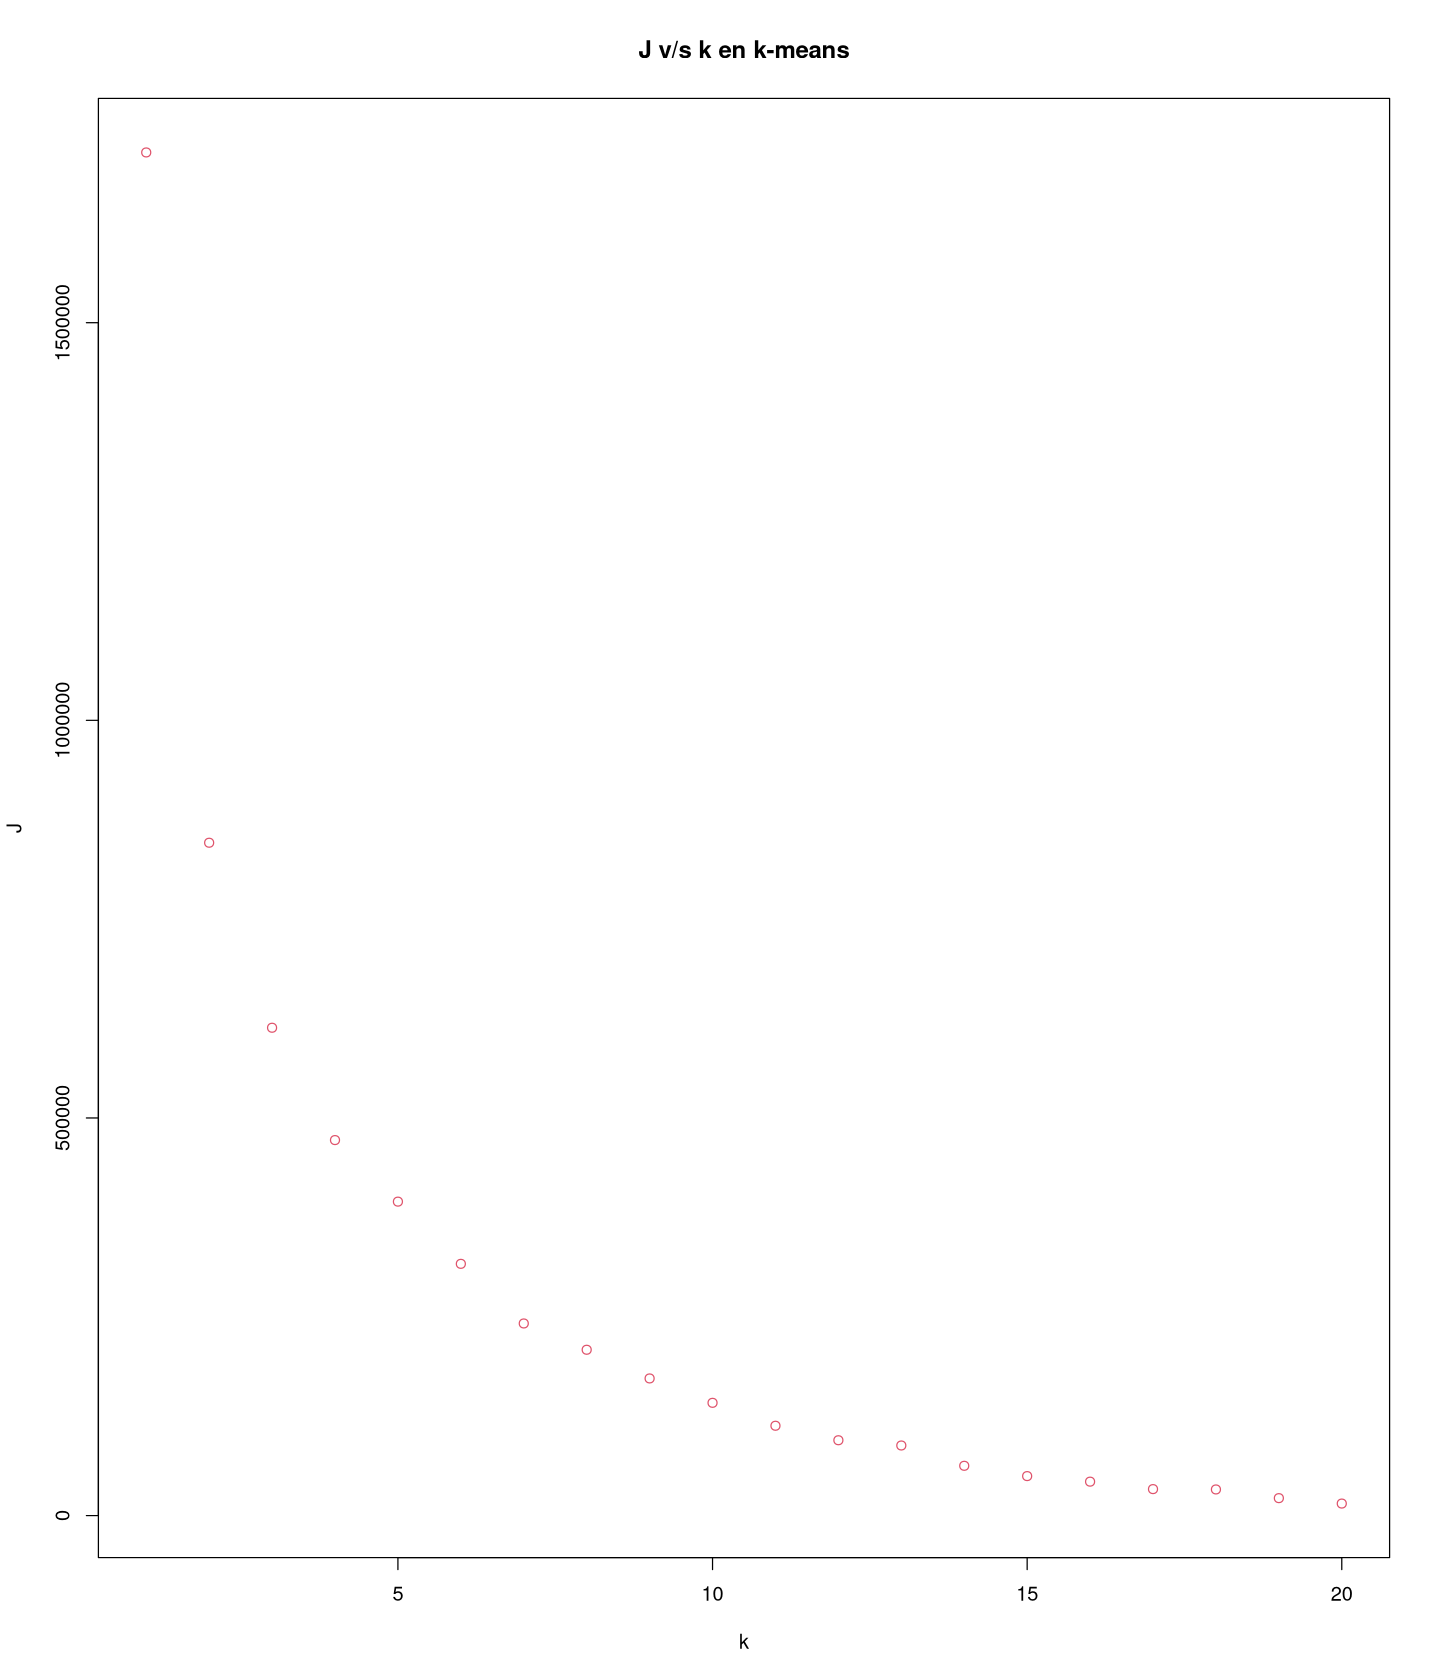

In [29]:
J<-rep(0,20)
fin_iter<-20
for (k in 1:fin_iter){
     clus<-kmeans(grupo,k,iter.max=1000,nstart=10)
	J[k]<-clus$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

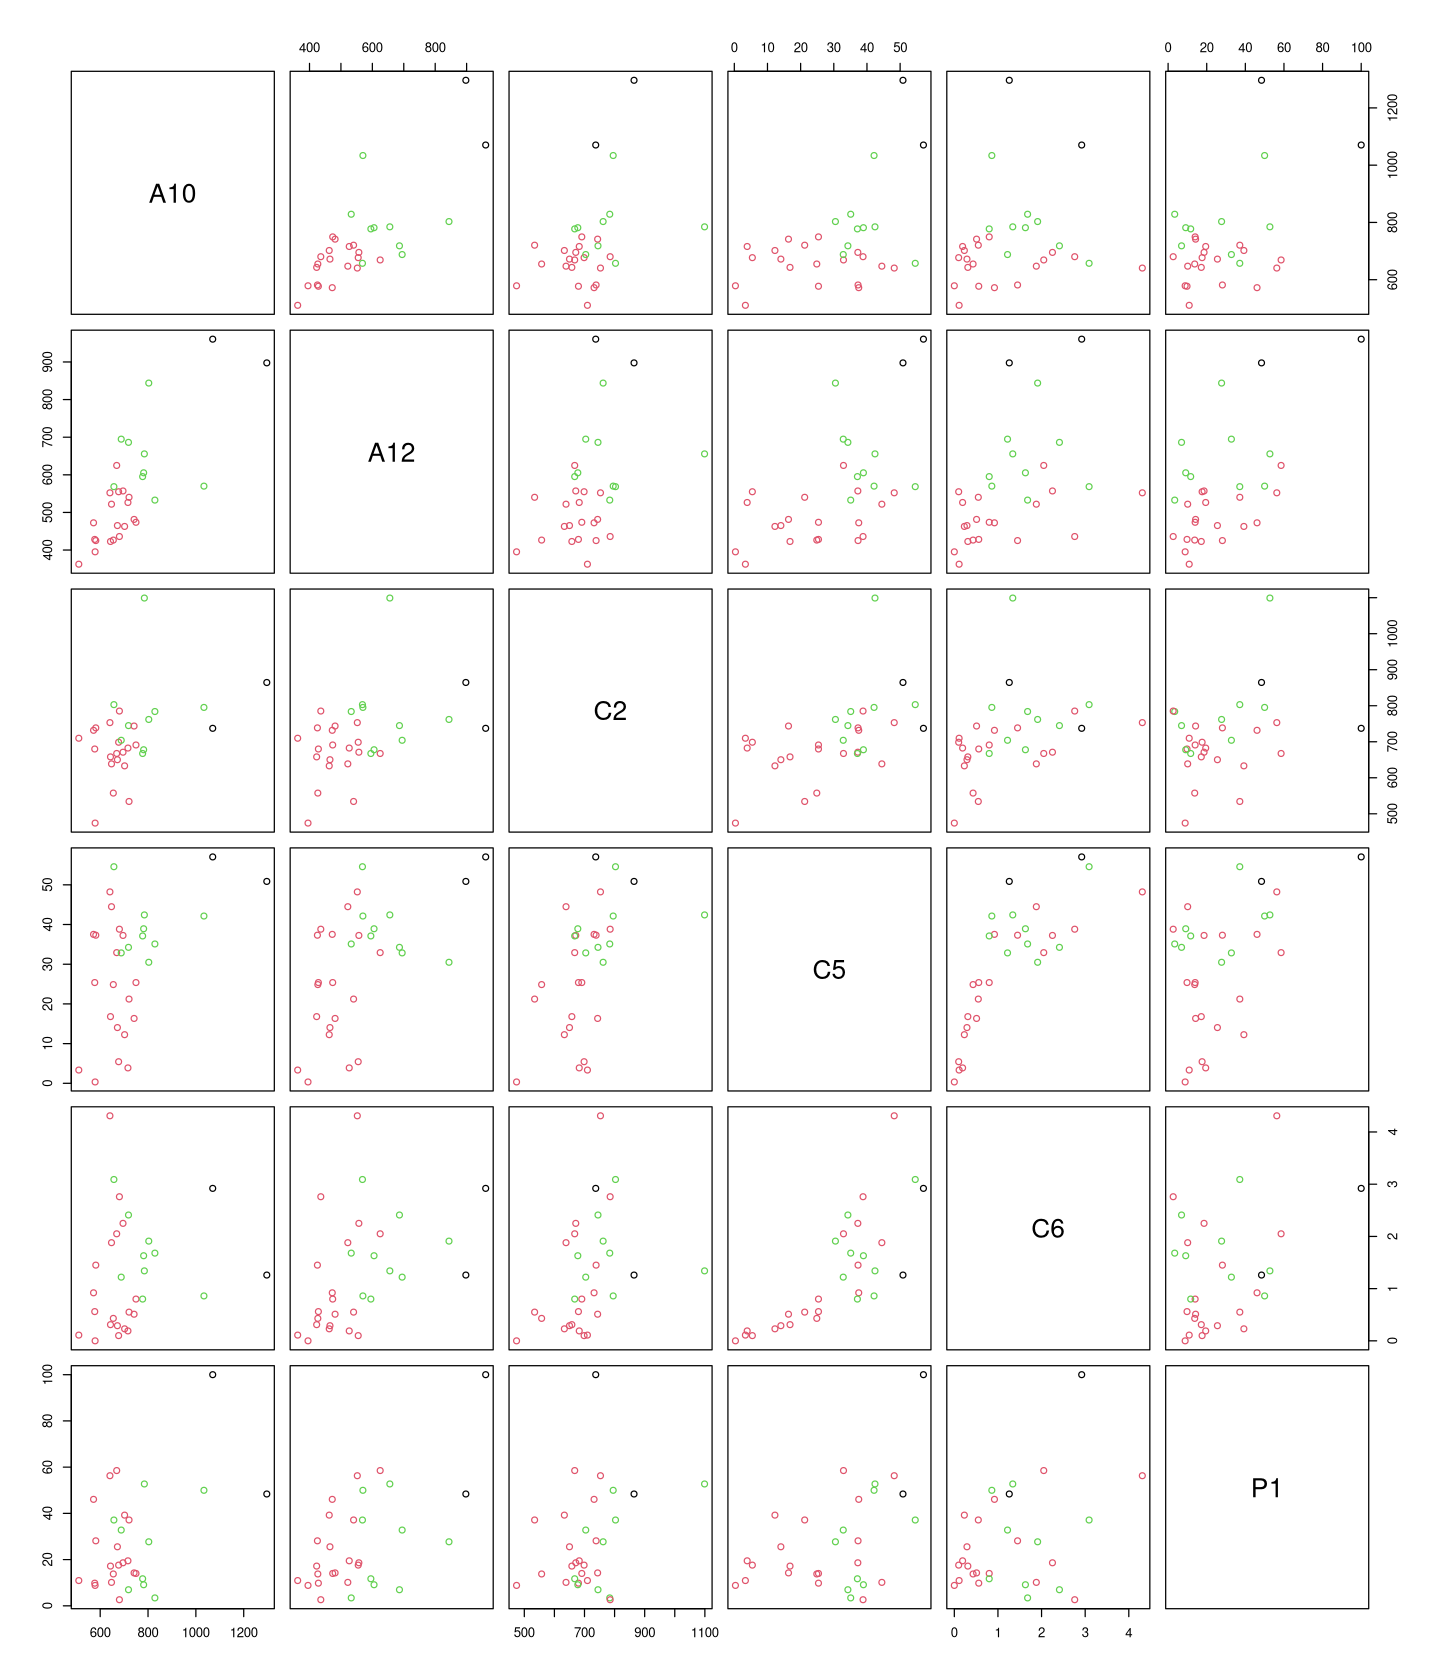

In [30]:
#ingresar valor de k 
k=3
clus<-kmeans(grupo,k,iter.max=1000,nstart=10)

#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(grupo,col=clus$cluster)

Consideramos k optimo 3, ya que al tener pocos valores se pierde el agrupamiento con una mayor cantidad de grupos.

Podemos observar del grafico C2/A10, que existe un menor consumo de energia electria cuando la distancia al establecimiento educacional es menor.
Del grafico C6/C5 podemos concluir existe vegetacion por comuna pero no es tan densa, p.e. pueden haber hartas areas verdes, pero pocos parques urbanos con alta vegetacion.
En el grafico A10/A12 observamos que la distancia entre establecimiento de eduacion básica e inicial, hay una agrupacion muy clara.

3. Analisis de componentes principales

Call:
princomp(x = grupo, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6 
1.8413722 1.0179873 0.8331297 0.7192044 0.4974518 0.3379817 

 6  variables and  30 observations.


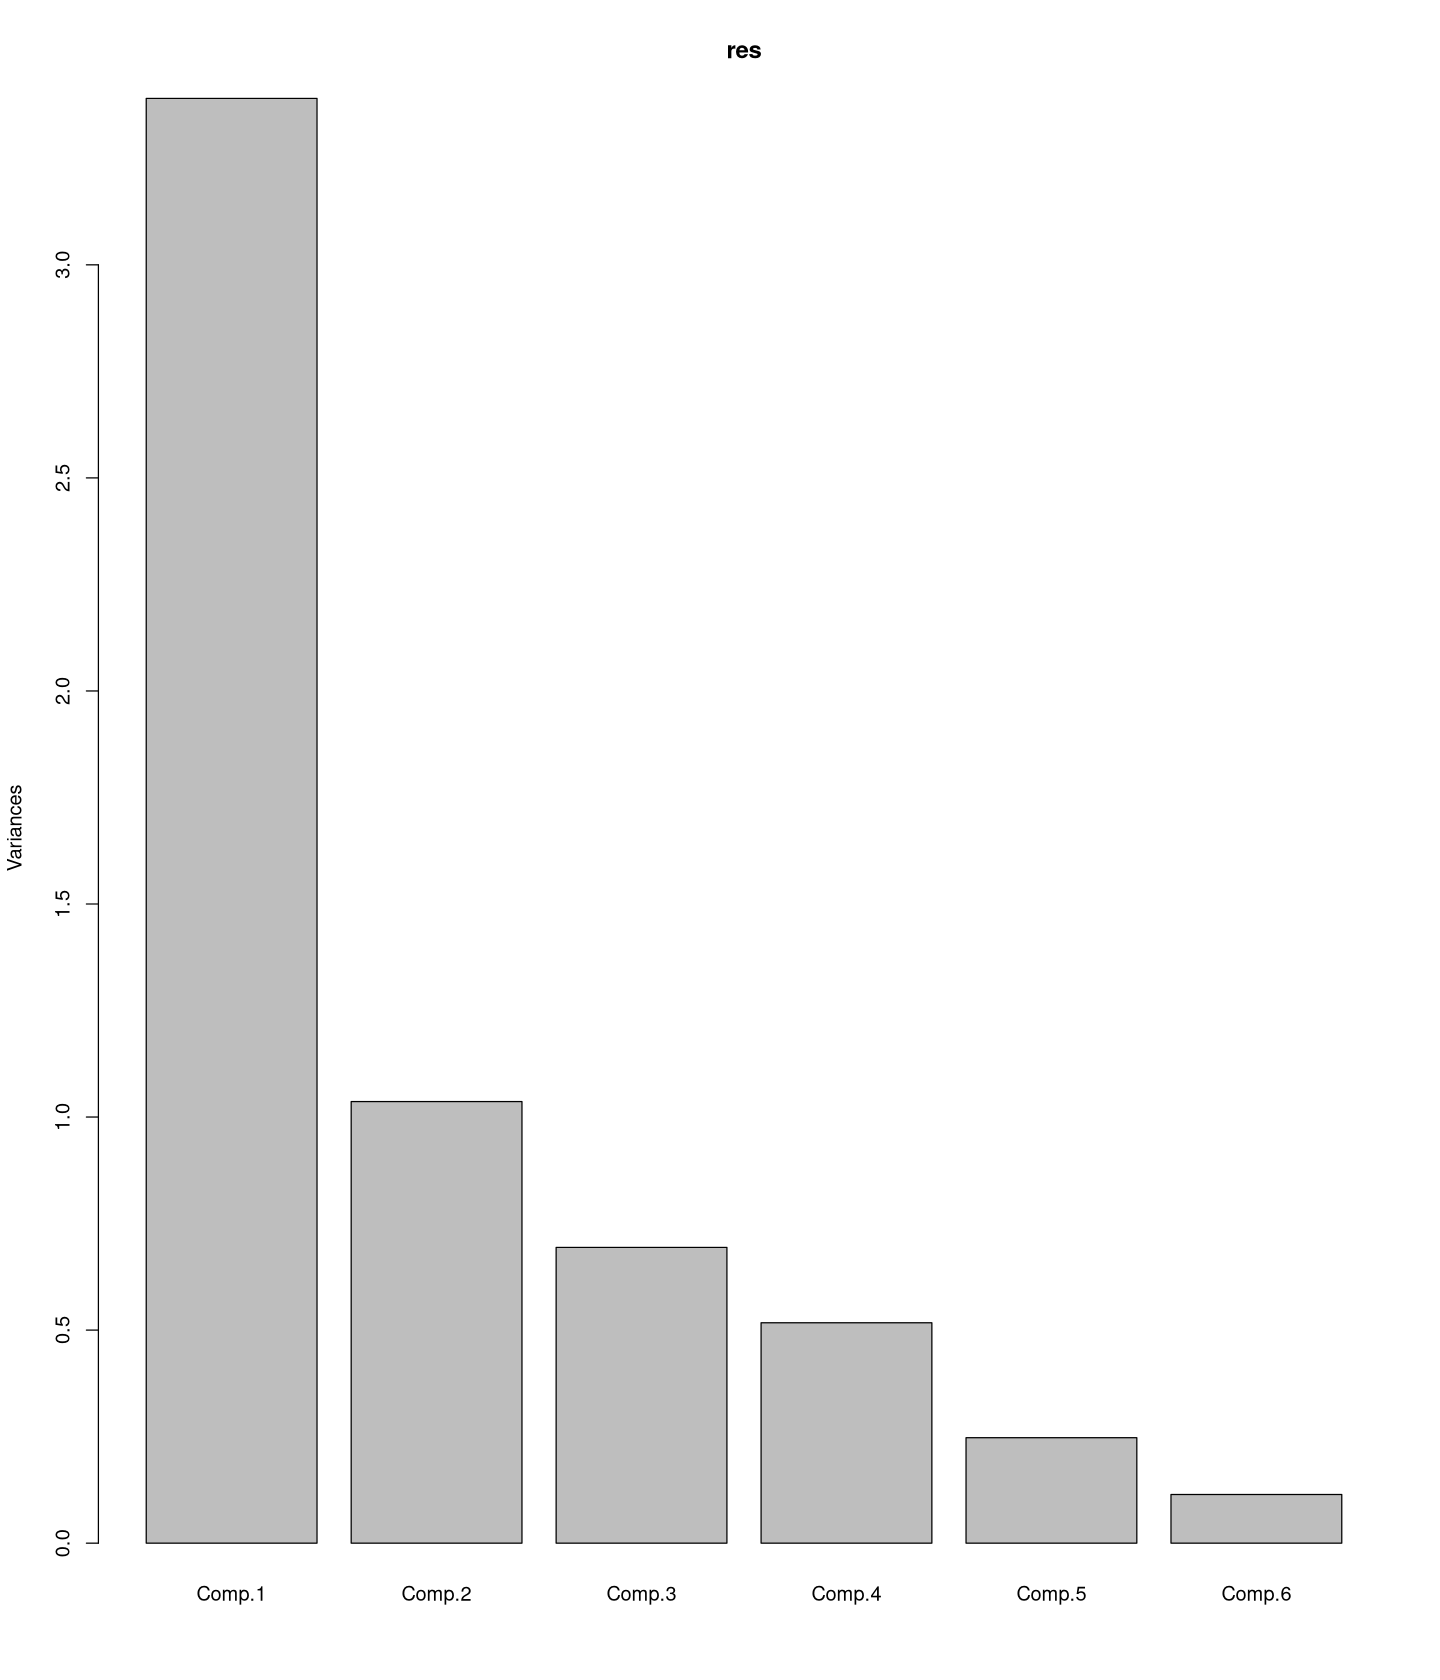

In [31]:
res <- princomp(grupo, cor=TRUE)
print(res)
plot(res)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6
1,4.4993393,1.7360314,-0.5553064,0.2518730,0.16656349,0.10212025
2,-0.9463339,-0.1216720,-0.1583936,-0.1556339,0.04515856,0.06142288
3,0.9979629,-0.1289217,0.4577880,0.2725887,-0.13234885,-0.15236392


K-means clustering with 3 clusters of sizes 2, 19, 9

Cluster means:
        A10      A12       C2       C5       C6       P1
1 1183.4611 929.1017 800.9619 53.94500 2.090000 74.19000
2  654.2194 480.4942 668.3522 23.46368 1.036842 23.58737
3  785.8698 639.1634 781.9399 38.65111 1.660000 25.72222

Clustering vector:
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 2  2  2  2  2  2  2  2  2  2  2  3  3  2  3  3  2  1  2  3  2  3  3  2  1  3 
27 28 29 30 
 2  3  2  2 

Within cluster sum of squares by cluster:
[1]  37005.64 274258.25 302190.43
 (between_SS / total_SS =  64.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

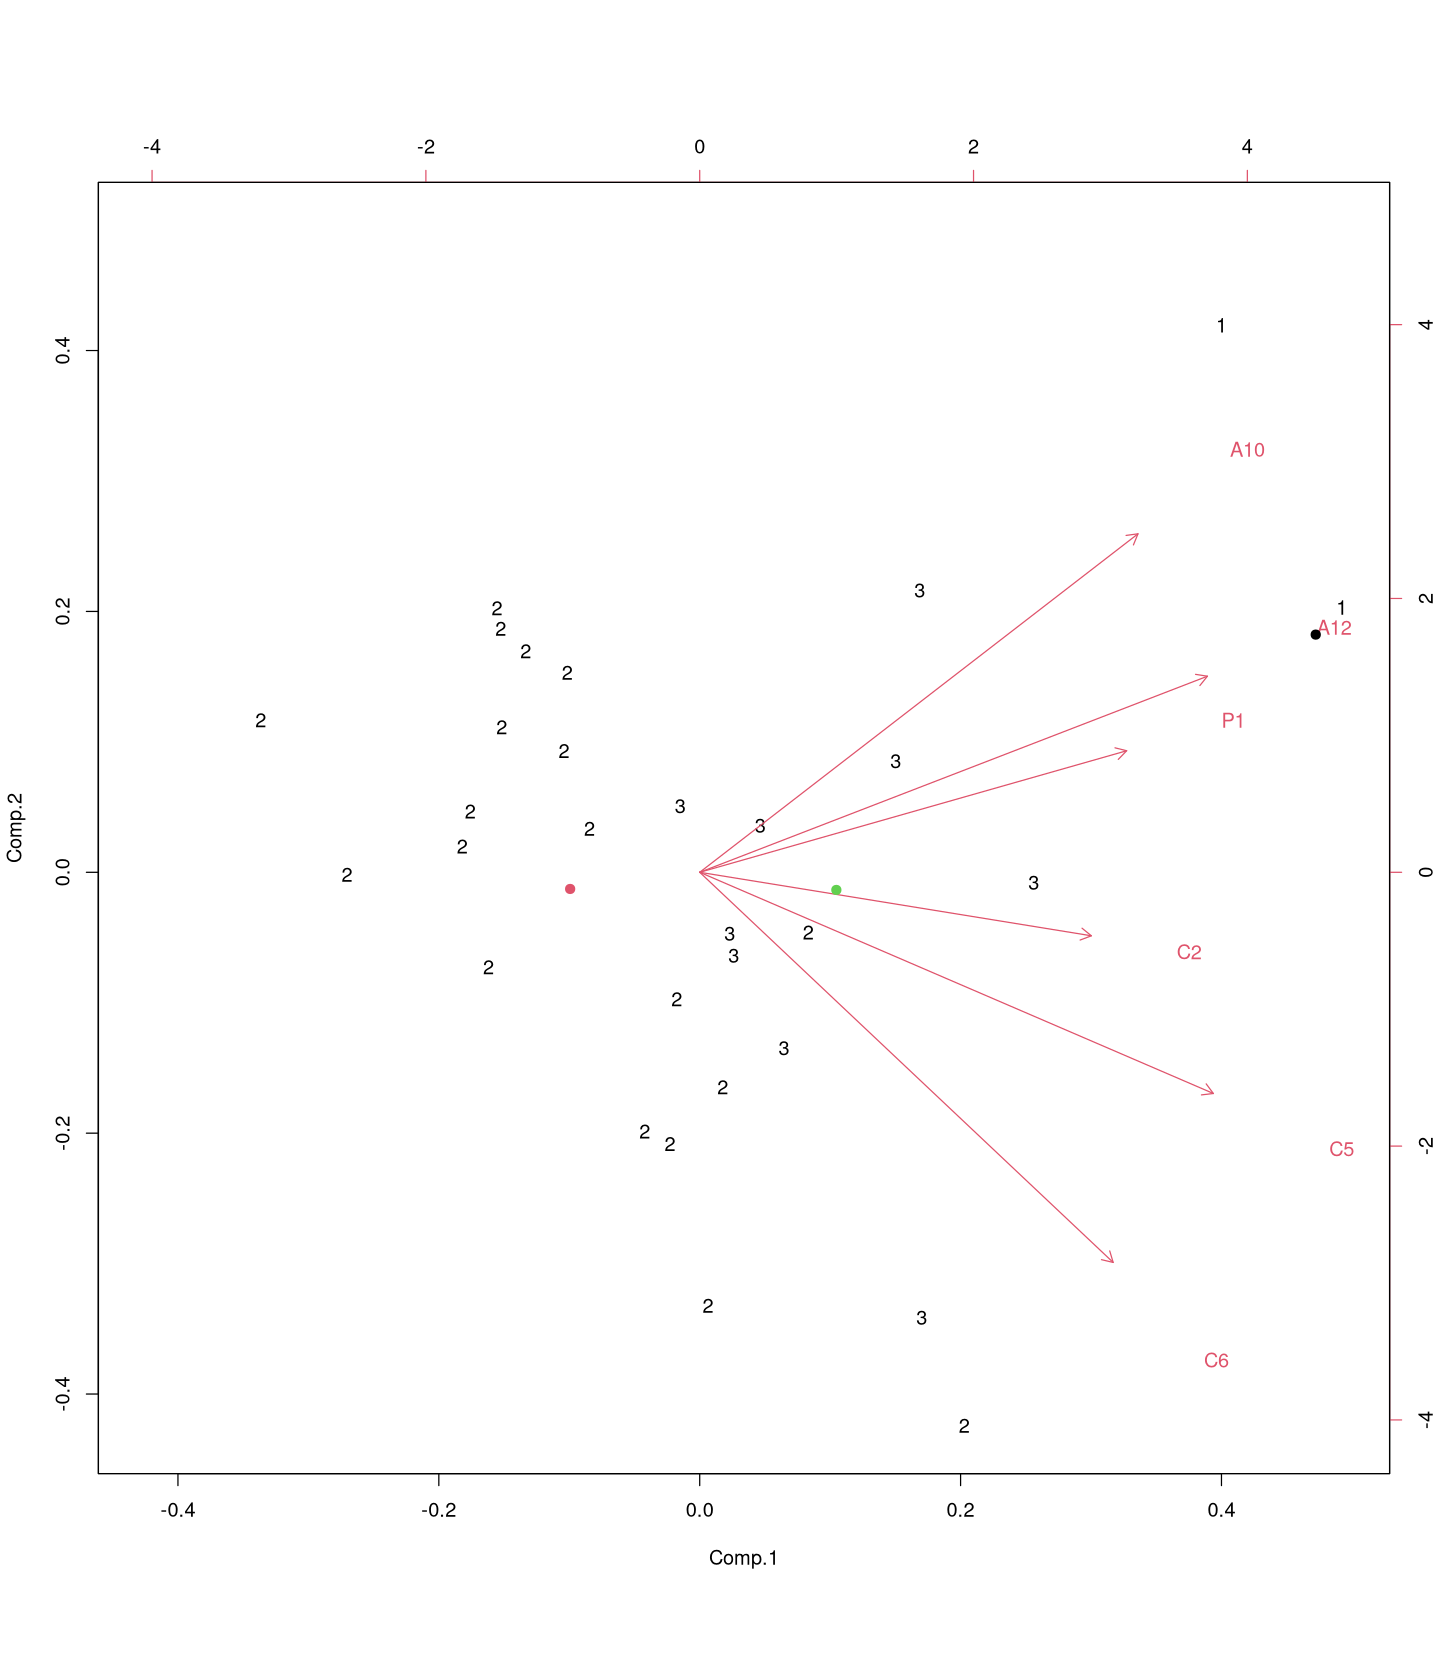

In [32]:
res2 <- predict(res,clus$centers)
res2
clus
biplot(res,xlabs=clus$cluster)

#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k,pch=19)

<h3>Desarrollo ejercicio 2.3</h3>